# House Prices Advanced Regression Techniques

In [1]:
#!pip3 install fetch

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request

import warnings
warnings.filterwarnings(action="ignore")

In [4]:

#url_=urllib.request.urlopen("https://github.com/wblakecannon/ames/blob/1b5396bd684de822e18a2206730527775a88f4ae/data/housing.csv")
#url_.url
houses = pd.read_csv("housing.csv")
houses.head()

Unnamed: 0  Order        PID  MS SubClass MS Zoning  Lot Frontage  \
0           0      1  526301100           20        RL         141.0   
1           1      2  526350040           20        RH          80.0   
2           2      3  526351010           20        RL          81.0   
3           3      4  526353030           20        RL          93.0   
4           4      5  527105010           60        RL          74.0   

   Lot Area Street Alley Lot Shape  ... Pool Area Pool QC  Fence Misc Feature  \
0     31770   Pave   NaN       IR1  ...         0     NaN    NaN          NaN   
1     11622   Pave   NaN       Reg  ...         0     NaN  MnPrv          NaN   
2     14267   Pave   NaN       IR1  ...         0     NaN    NaN         Gar2   
3     11160   Pave   NaN       Reg  ...         0     NaN    NaN          NaN   
4     13830   Pave   NaN       IR1  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type Sale Condition  SalePrice  
0        0       5    2010       WD          Normal     215000  
1        0       6    2010       WD          Normal     105000  
2    12500       6    2010       WD          Normal     172000  
3        0       4    2010       WD          Normal     244000  
4        0       3    2010       WD          Normal     189900  

[5 rows x 83 columns]

In [5]:
test   = pd.read_csv('test_houses.csv')
train  = pd.read_csv('train.csv')

In [6]:
print('houses.shape :', houses.shape)
print('train.shape  :', train.shape)
print('test.shape   :', test.shape)

houses.shape : (2930, 83)
train.shape  : (1460, 81)
test.shape   : (1459, 80)


In [21]:
def print_long_list(x, n_items):
    for i in range(0, len(x), n_items):
        #print(x[i:i+n_items])#, len(x))])
        print(x[i:min(i+n_items, len(x))])

In [22]:
print('houses.columns :')
print_long_list(list(houses.columns), 6)

houses.columns :
['Unnamed: 0', 'Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage']
['Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities']
['Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type']
['House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style']
['Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual']
['Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1']
['BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating']
['Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF']
['Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr']
['Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu']
['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual']


In [23]:
print('train.columns :')
print_long_list(list(train.columns), 6)

train.columns :
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']
['Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope']
['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st']
['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir']
['Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']
['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']
['TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt']
['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenP

In [24]:
print('test.columns :')
print_long_list(list(test.columns), 6)

test.columns :
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']
['Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope']
['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st']
['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir']
['Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']
['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']
['TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt']
['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPo

In [25]:
str_delimaters = '-., |:/\\'
for c in str_delimaters:
    houses.columns = houses.columns.str.replace(c, '')
    train.columns  = train.columns.str.replace(c, '')
    test.columns   = test.columns.str.replace(c, '')

In [26]:
print('houses.columns :')
print_long_list(list(houses.columns), 6)

houses.columns :
['Unnamed0', 'Order', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage']
['LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']
['LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']
['HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle']
['RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual']
['ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']
['BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating']
['HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
['KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu']
['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual']
['GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'

In [27]:
print('train.columns :')
print_long_list(list(train.columns), 6)

train.columns :
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']
['Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope']
['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st']
['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir']
['Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']
['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']
['TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt']
['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenP

In [28]:
print('test.columns :')
print_long_list(list(test.columns), 6)

test.columns :
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']
['Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope']
['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st']
['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir']
['Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']
['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']
['TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt']
['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPo

In [29]:
def compare_columns(df1, df2):
    df1_columns_set = set(df1.columns)
    df2_columns_set = set(df2.columns)
    print('df1_columns_set - df2_columns_set :', df1_columns_set - df2_columns_set)
    print('df2_columns_set - df1_columns_set :', df2_columns_set - df1_columns_set)

In [30]:
compare_columns(houses, train)

df1_columns_set - df2_columns_set : {'Unnamed0', 'Order', 'PID'}
df2_columns_set - df1_columns_set : {'Id'}


In [31]:
compare_columns(houses, test)

df1_columns_set - df2_columns_set : {'Unnamed0', 'Order', 'SalePrice', 'PID'}
df2_columns_set - df1_columns_set : {'Id'}


In [32]:
compare_columns(train, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [33]:
houses[['SalePrice', 'Order', 'PID']].head()

SalePrice  Order        PID
0     215000      1  526301100
1     105000      2  526350040
2     172000      3  526351010
3     244000      4  526353030
4     189900      5  527105010

In [34]:
train[['Id', 'SalePrice']].head()

Id  SalePrice
0   1     208500
1   2     181500
2   3     223500
3   4     140000
4   5     250000

In [35]:
test[['Id']].head()

Id
0  1461
1  1462
2  1463
3  1464
4  1465

In [36]:
print('houses[SalePrice].describe()')
houses['SalePrice'].describe()

houses[SalePrice].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [37]:
print('train[SalePrice].describe()')
train['SalePrice'].describe()

train[SalePrice].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
print('houses[SalePrice].info()')
houses[['SalePrice']].info()

houses[SalePrice].info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  2930 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB


In [22]:
print('train[SalePrice].info()')
train[['SalePrice']].info()

train[SalePrice].info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [23]:
test_id = test['Id']

In [24]:
houses = houses.drop(columns=['PID', 'Order'])
train  = train.drop(columns=['Id'])
test   = test.drop(columns=['Id'])

In [25]:
compare_columns(houses, train)

df1_columns_set - df2_columns_set : set()
df2_columns_set - df1_columns_set : set()


In [26]:
compare_columns(houses, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [27]:
compare_columns(train, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [28]:
print('houses.shape :', houses.shape)
print('train.shape  :', train.shape)
print('test.shape   :', test.shape)

houses.shape : (2930, 80)
train.shape  : (1460, 80)
test.shape   : (1459, 79)


In [29]:
houses.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL        141.0    31770   Pave   NaN      IR1   
1          20       RH         80.0    11622   Pave   NaN      Reg   
2          20       RL         81.0    14267   Pave   NaN      IR1   
3          20       RL         93.0    11160   Pave   NaN      Reg   
4          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
2         Lvl    AllPub    Corner  ...        0    NaN    NaN        Gar2   
3         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      5    2010       WD          Normal     215000  
1       0      6    2010       WD          Normal     105000  
2   12500      6    2010       WD          Normal     172000  
3       0      4    2010       WD          Normal     244000  
4       0      3    2010       WD          Normal     189900  

[5 rows x 80 columns]

In [30]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [31]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [39]:
data = pd.concat([houses, train])
print('data.shape  :', data.shape)

data.shape  : (4390, 84)


In [40]:
data = data.drop_duplicates()
print('data.shape  :', data.shape)

data.shape  : (4390, 84)


In [41]:
print('test.shape  :', test.shape)

test.shape  : (1459, 80)


In [42]:
del houses, train

In [43]:
def calc_datatypes(df):
    dtypes = {}
    for column_name in df:
        x = str(df[column_name].dtype)
        dtypes[x] = dtypes.get(x, 0) + 1
    return dtypes

In [44]:
calc_datatypes(data)

{'float64': 15, 'int64': 26, 'object': 43}

In [45]:
calc_datatypes(test)

{'int64': 26, 'object': 43, 'float64': 11}

In [46]:
def get_datatypes(df):
    dtypes = {}
    for column_name in df:
        x = str(df[column_name].dtype)
        if x not in dtypes:
            dtypes[x] = [column_name]
        else:
            dtypes[x] += [column_name]
    return dtypes

In [47]:
res = get_datatypes(data)
for i in res: 
    print('==>', i, len(res[i]))
    print_long_list(res[i], 6)
    print()

==> float64 15
['Unnamed0', 'Order', 'PID', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']
['GarageCars', 'GarageArea', 'Id']

==> int64 26
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath']
['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF']
['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']
['YrSold', 'SalePrice']

==> object 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']
['LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']
['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
['BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrica

In [48]:
data[data.dtypes[data.dtypes == 'object'].index].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
1       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
3       RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0        NAmes       Norm  ...     Attchd          Fin         TA         TA   
1        NAmes      Feedr  ...     Attchd          Unf         TA         TA   
2        NAmes       Norm  ...     Attchd          Unf         TA         TA   
3        NAmes       Norm  ...     Attchd          Fin         TA         TA   
4      Gilbert       Norm  ...     Attchd          Fin         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          P    NaN    NaN         NaN      WD         Normal  
1          Y    NaN  MnPrv         NaN      WD         Normal  
2          Y    NaN    NaN        Gar2      WD         Normal  
3          Y    NaN    NaN         NaN      WD         Normal  
4          Y    NaN  MnPrv         NaN      WD         Normal  

[5 rows x 43 columns]

In [49]:
data[data.dtypes[data.dtypes == 'int64'].index].head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          20    31770            6            5       1960          1960   
1          20    11622            5            6       1961          1961   
2          20    14267            6            6       1958          1958   
3          20    11160            7            5       1968          1968   
4          60    13830            5            5       1997          1998   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  WoodDeckSF  OpenPorchSF  \
0      1656         0             0       1656  ...         210           62   
1       896         0             0        896  ...         140            0   
2      1329         0             0       1329  ...         393           36   
3      2110         0             0       2110  ...           0            0   
4       928       701             0       1629  ...         212           34   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       5    2010   
1              0          0          120         0        0       6    2010   
2              0          0            0         0    12500       6    2010   
3              0          0            0         0        0       4    2010   
4              0          0            0         0        0       3    2010   

   SalePrice  
0     215000  
1     105000  
2     172000  
3     244000  
4     189900  

[5 rows x 26 columns]

In [50]:
data[data.dtypes[data.dtypes == 'float64'].index].head()

Unnamed0  Order          PID  LotFrontage  MasVnrArea  BsmtFinSF1  \
0       0.0    1.0  526301100.0        141.0       112.0       639.0   
1       1.0    2.0  526350040.0         80.0         0.0       468.0   
2       2.0    3.0  526351010.0         81.0       108.0       923.0   
3       3.0    4.0  526353030.0         93.0         0.0      1065.0   
4       4.0    5.0  527105010.0         74.0         0.0       791.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  \
0         0.0      441.0       1080.0           1.0           0.0   
1       144.0      270.0        882.0           0.0           0.0   
2         0.0      406.0       1329.0           0.0           0.0   
3         0.0     1045.0       2110.0           1.0           0.0   
4         0.0      137.0        928.0           0.0           0.0   

   GarageYrBlt  GarageCars  GarageArea  Id  
0       1960.0         2.0       528.0 NaN  
1       1961.0         1.0       730.0 NaN  
2       1958.0         1.0       312.0 NaN  
3       1968.0         2.0       522.0 NaN  
4       1997.0         2.0       482.0 NaN

In [51]:
res = get_datatypes(test)
for i in res: 
    print('==>', i, len(res[i]))
    print_long_list(res[i], 6)
    print()

==> int64 26
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
['YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath']
['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF']
['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
['MoSold', 'YrSold']

==> object 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']
['LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']
['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
['BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual']
['GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
['SaleCondition']

==> float64 11
['LotFrontage', 'M

In [52]:
test[test.dtypes[test.dtypes == 'object'].index].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0        NAmes      Feedr  ...     Attchd          Unf         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
3      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
4      StoneBr       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN  MnPrv         NaN       WD        Normal  
1          Y    NaN    NaN        Gar2       WD        Normal  
2          Y    NaN  MnPrv         NaN       WD        Normal  
3          Y    NaN    NaN         NaN       WD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [53]:
test[test.dtypes[test.dtypes == 'int64'].index].head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1461          20    11622            5            6       1961   
1  1462          20    14267            6            6       1958   
2  1463          60    13830            5            5       1997   
3  1464          60     9978            6            6       1998   
4  1465         120     5005            8            5       1992   

   YearRemodAdd  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  Fireplaces  \
0          1961       896         0             0  ...           0   
1          1958      1329         0             0  ...           0   
2          1998       928       701             0  ...           1   
3          1998       926       678             0  ...           1   
4          1992      1280         0             0  ...           0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         140            0              0          0          120         0   
1         393           36              0          0            0         0   
2         212           34              0          0            0         0   
3         360           36              0          0            0         0   
4           0           82              0          0          144         0   

   MiscVal  MoSold  YrSold  
0        0       6    2010  
1    12500       6    2010  
2        0       3    2010  
3        0       6    2010  
4        0       1    2010  

[5 rows x 26 columns]

In [54]:
test[test.dtypes[test.dtypes == 'float64'].index].head()

LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         80.0         0.0       468.0       144.0      270.0        882.0   
1         81.0       108.0       923.0         0.0      406.0       1329.0   
2         74.0         0.0       791.0         0.0      137.0        928.0   
3         78.0        20.0       602.0         0.0      324.0        926.0   
4         43.0         0.0       263.0         0.0     1017.0       1280.0   

   BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea  
0           0.0           0.0       1961.0         1.0       730.0  
1           0.0           0.0       1958.0         1.0       312.0  
2           0.0           0.0       1997.0         2.0       482.0  
3           0.0           0.0       1998.0         2.0       470.0  
4           0.0           0.0       1992.0         2.0       506.0

## Exploratory Data Analysis and Visualization

In [55]:
data["LogSalePrice"] = data['SalePrice'].apply(np.log)
data["LogSalePrice"]

0       12.278393
1       11.561716
2       12.055250
3       12.404924
4       12.154253
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: LogSalePrice, Length: 4390, dtype: float64

In [56]:
def plot_feat(df, feat_name, xlabel_text, shape):
    (mu, sigma) = stats.norm.fit(df)    
    plt.figure(figsize=shape)
    sns.distplot(df, kde=True, hist=True, fit=stats.norm, color="tomato")
    plt.title(feat_name + ' Distribution vs Normal Distribution', fontsize=14)
    plt.xlabel(xlabel_text,    fontsize=12)
    plt.ylabel("Frequency %",  fontsize=12)
    plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='upper center')
    plt.show()

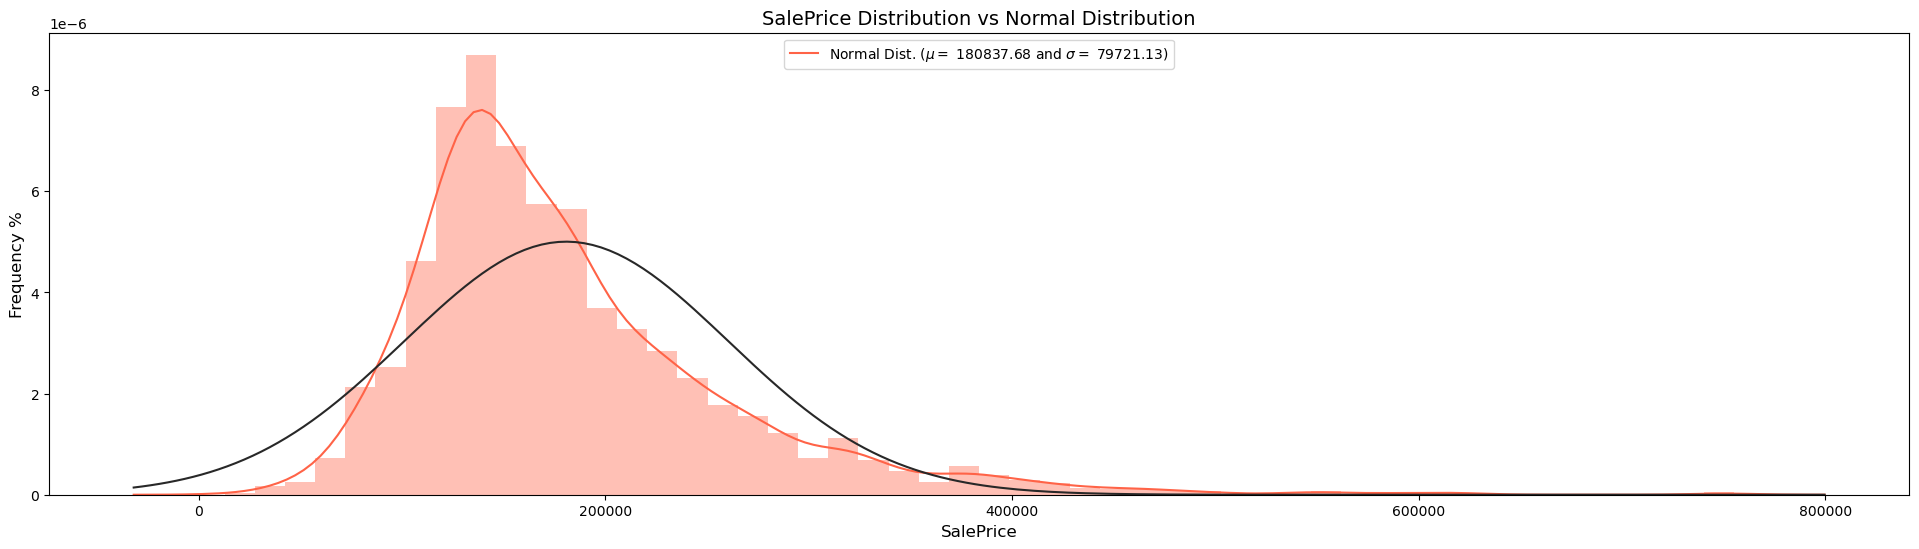

In [57]:
feat_name = 'SalePrice'
plot_feat(data[feat_name], feat_name, feat_name, (24,6))

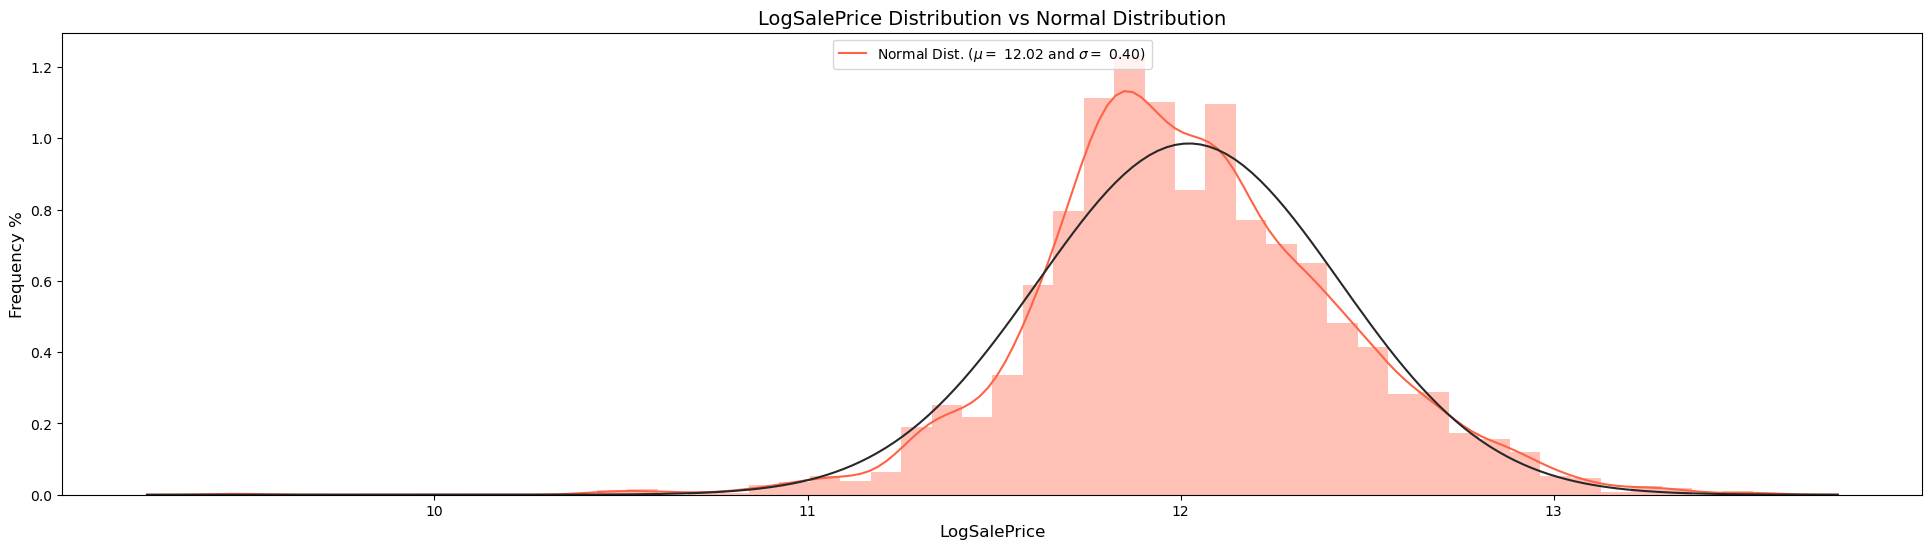

In [58]:
feat_name = 'LogSalePrice'
plot_feat(data[feat_name], feat_name, feat_name, (24,6))

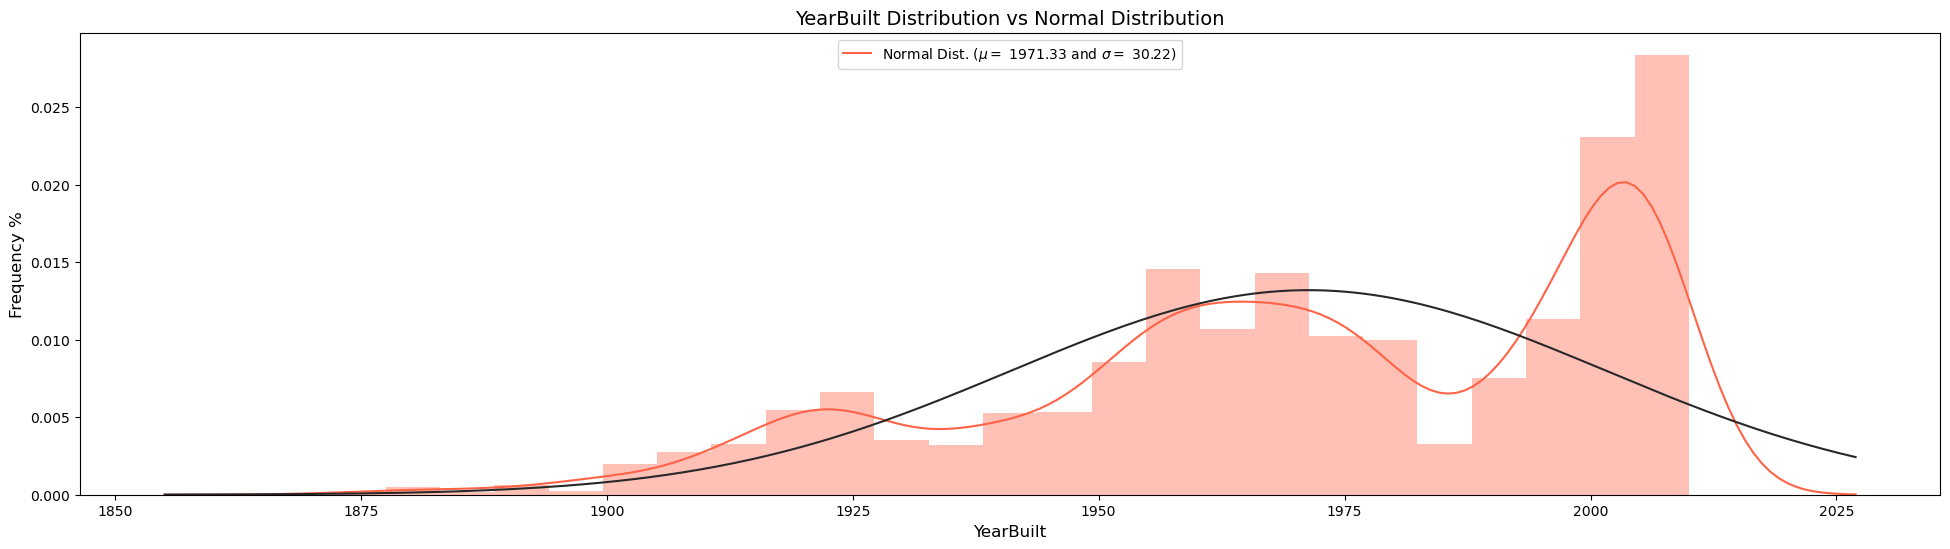

In [59]:
feat_name = 'YearBuilt'
plot_feat(data[feat_name], feat_name, feat_name, (24,6))

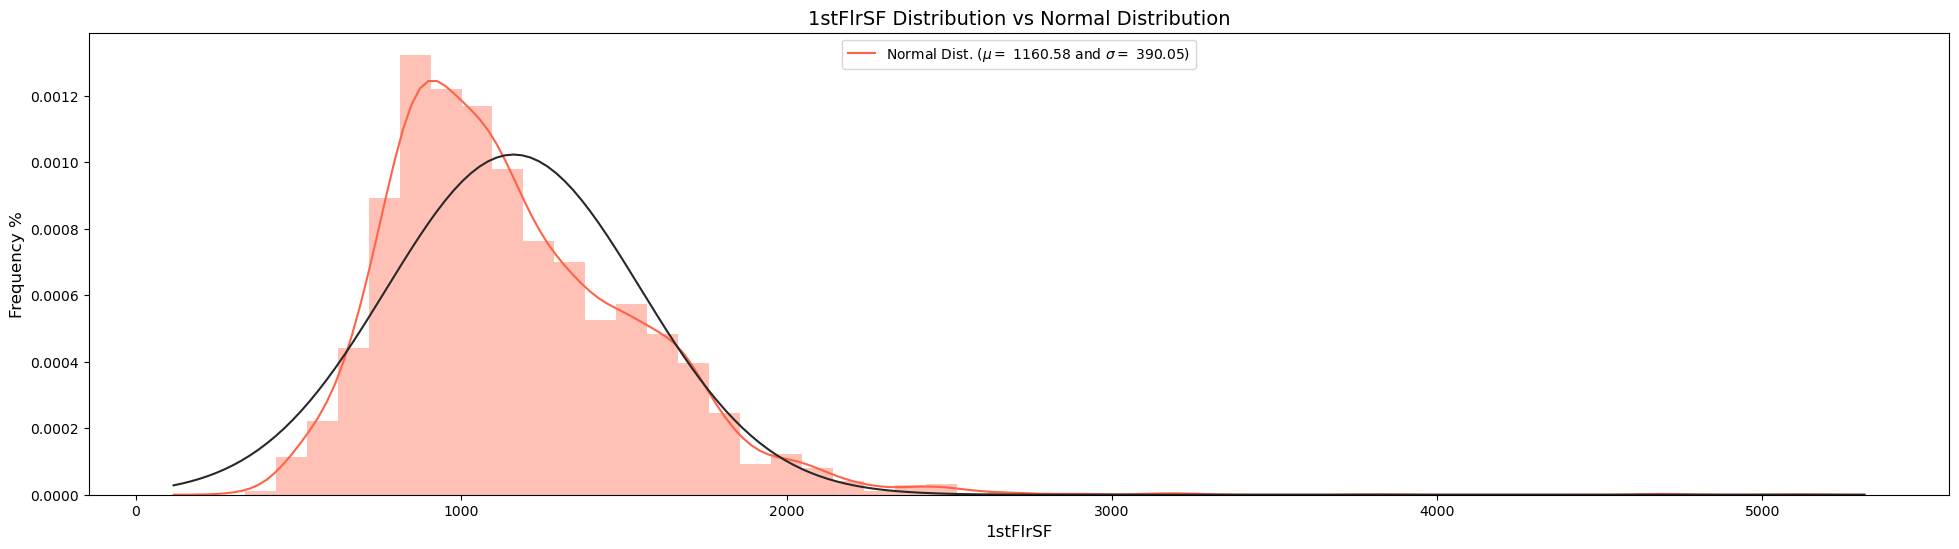

In [60]:
feat_name = '1stFlrSF'
plot_feat(data[feat_name], feat_name, feat_name, (24,6))

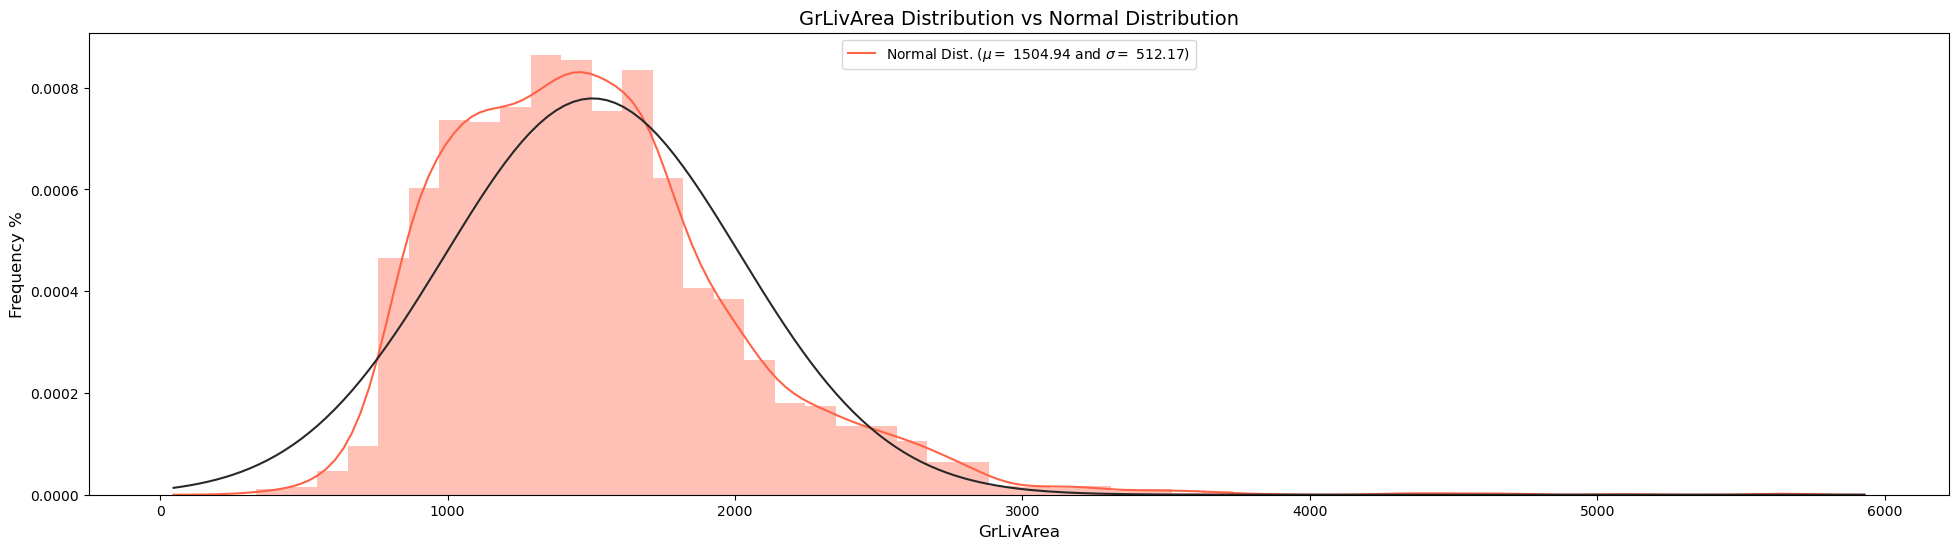

In [61]:
feat_name = 'GrLivArea'
plot_feat(data[feat_name], feat_name, feat_name, (24,6))

In [62]:
def plot_two_feats(df, feat1_name, feat2_name, shape):
    plt.figure(figsize=shape)
    sns.regplot(data=df, x=feat1_name, y=feat2_name, scatter_kws={'alpha':0.2})
    plt.title(feat1_name+' vs '+feat2_name, fontsize=14)
    plt.show()

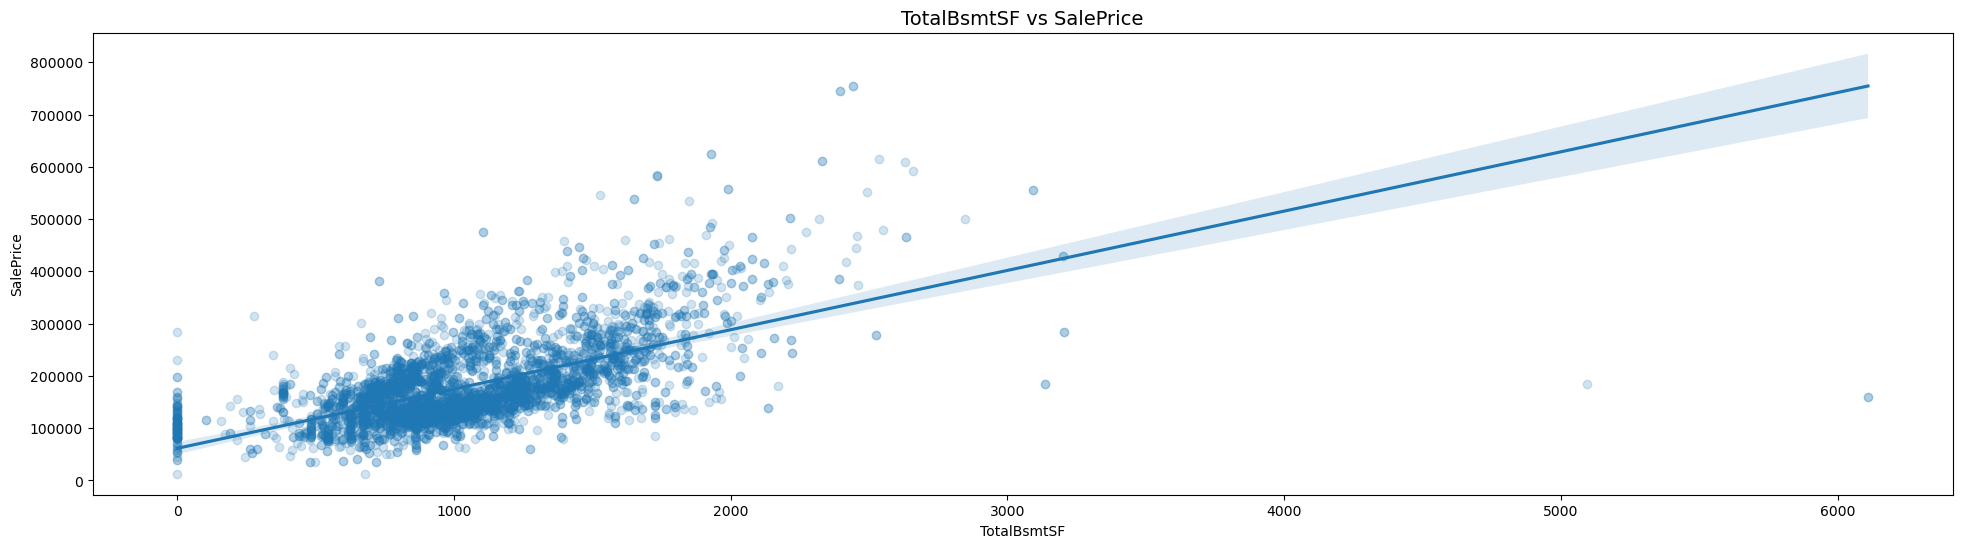

In [63]:
feat1_name, feat2_name = 'TotalBsmtSF', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

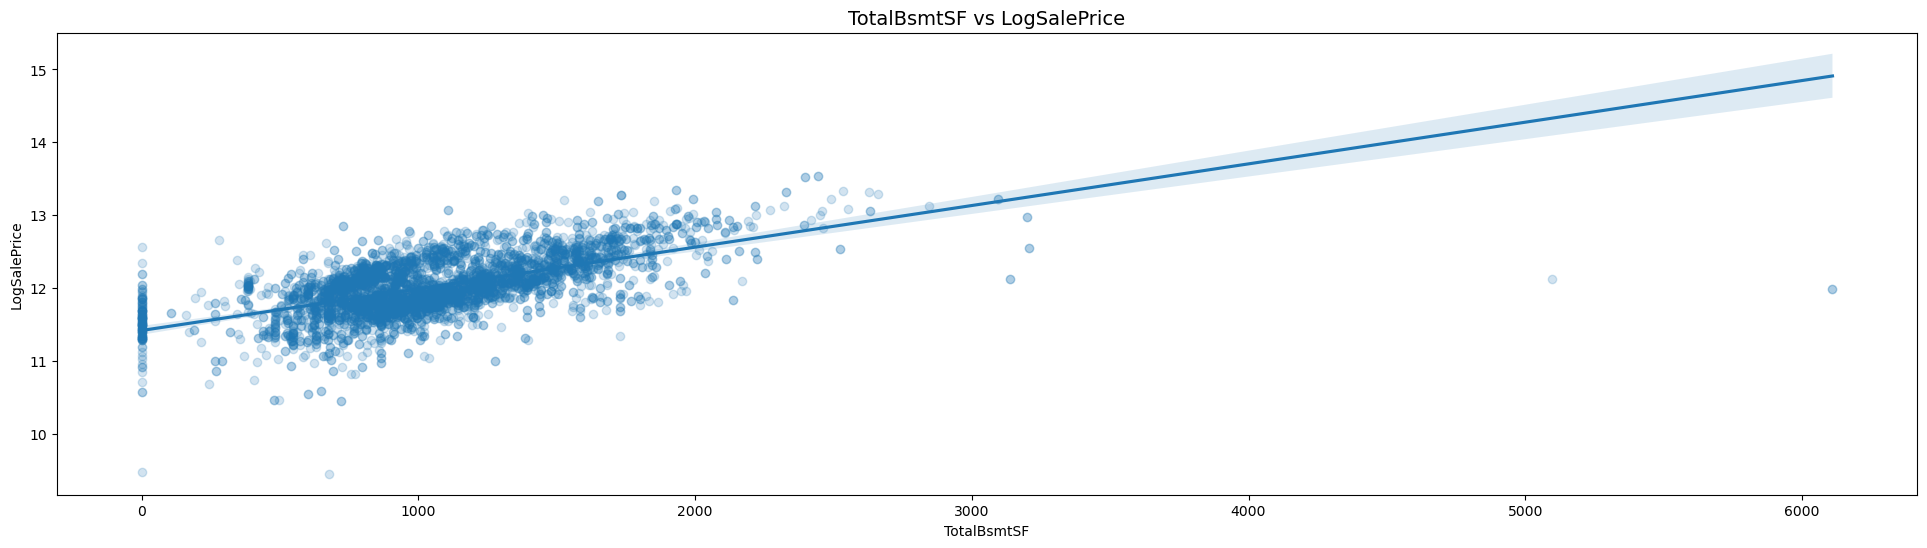

In [64]:
feat1_name, feat2_name = 'TotalBsmtSF', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

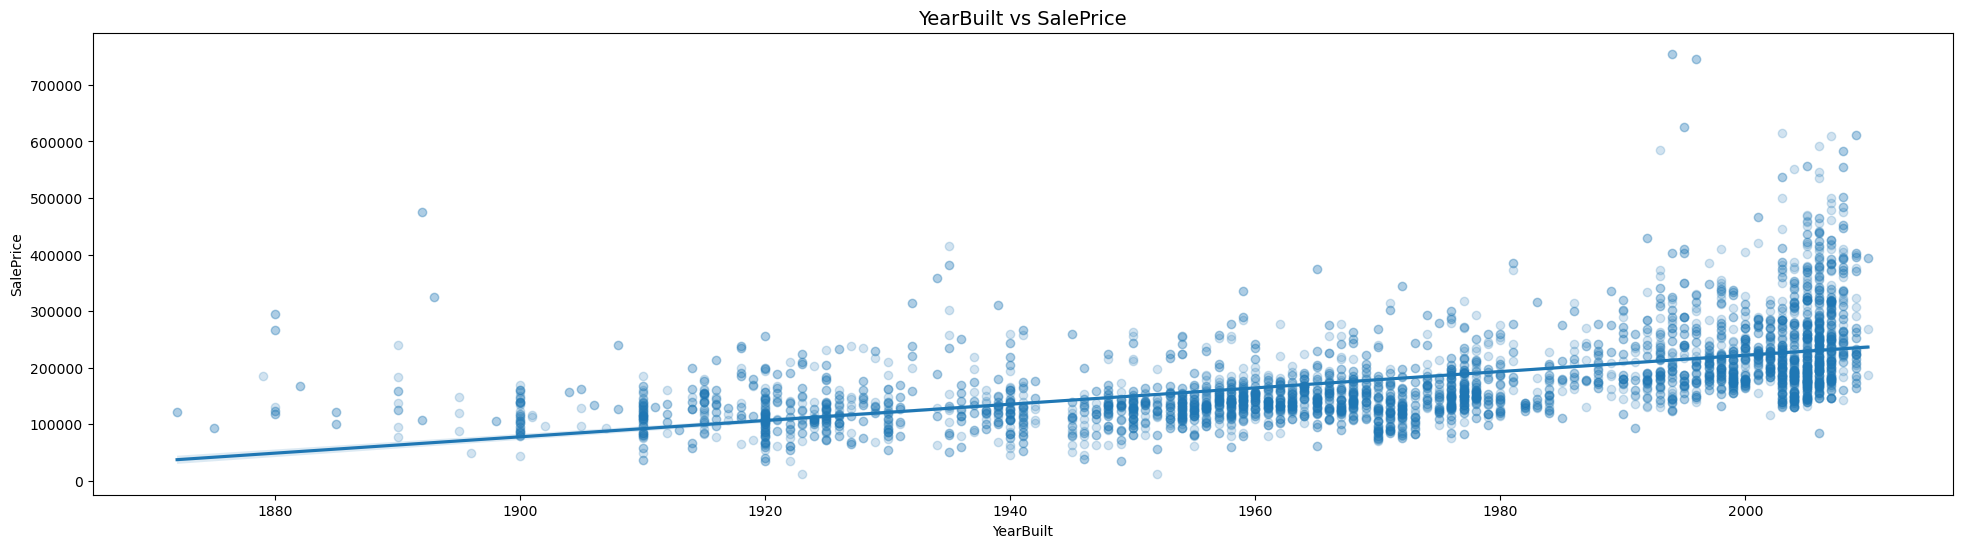

In [65]:
feat1_name, feat2_name = 'YearBuilt', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

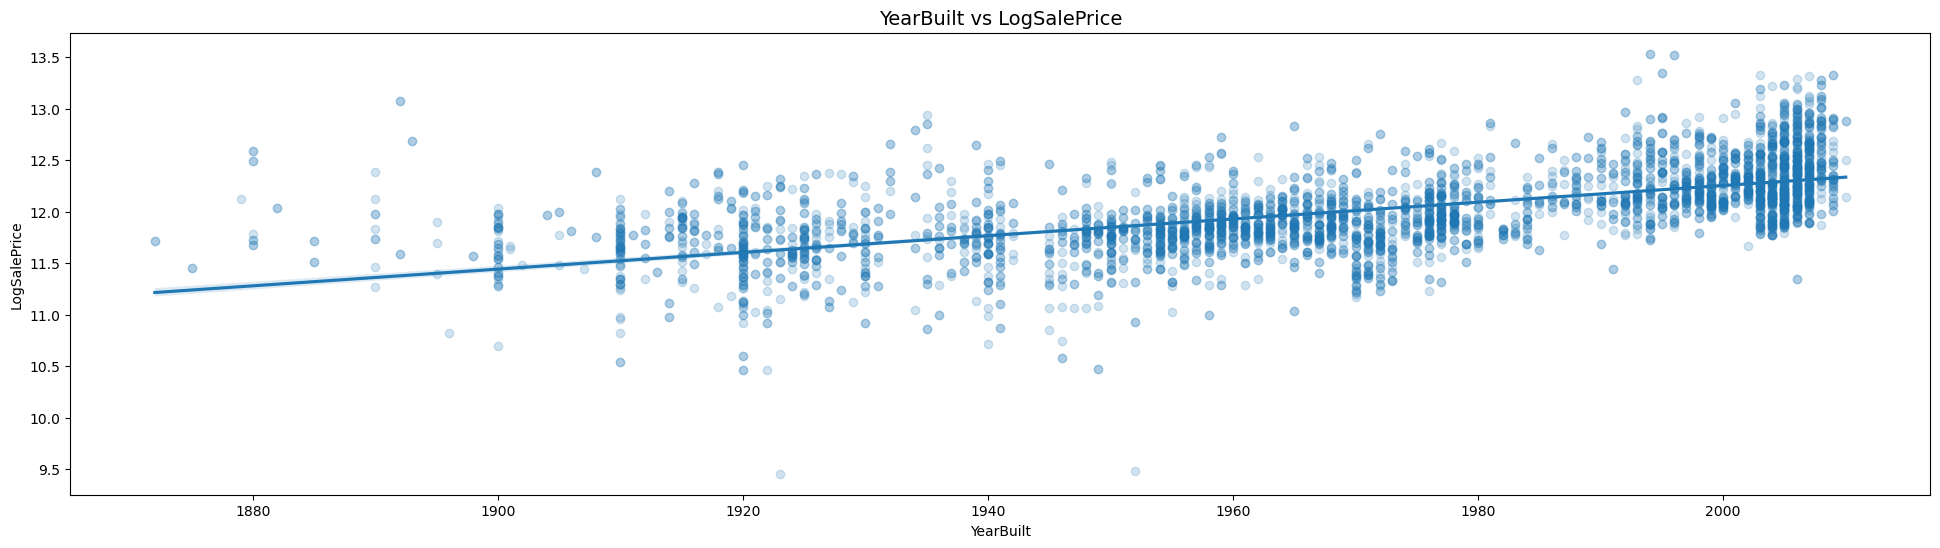

In [66]:
feat1_name, feat2_name = 'YearBuilt', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

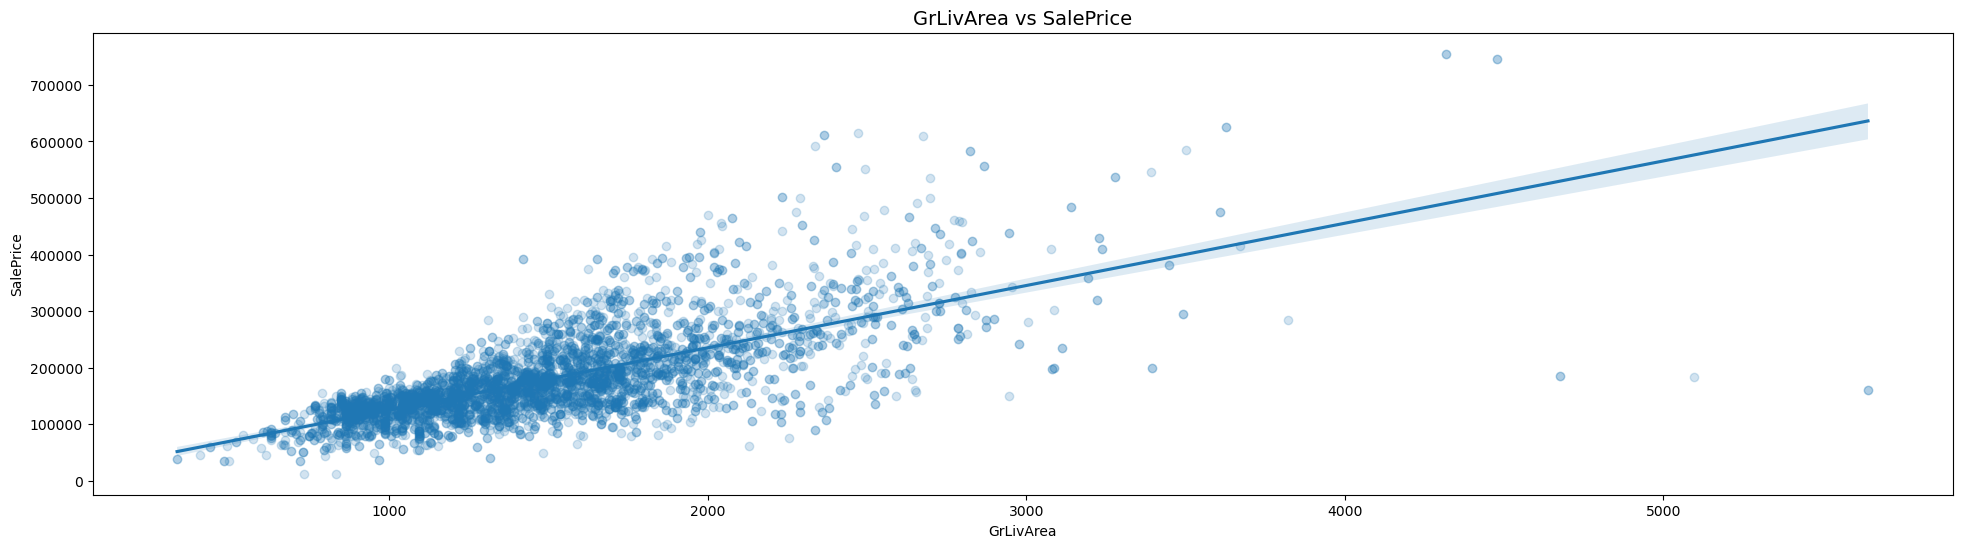

In [67]:
feat1_name, feat2_name = 'GrLivArea', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

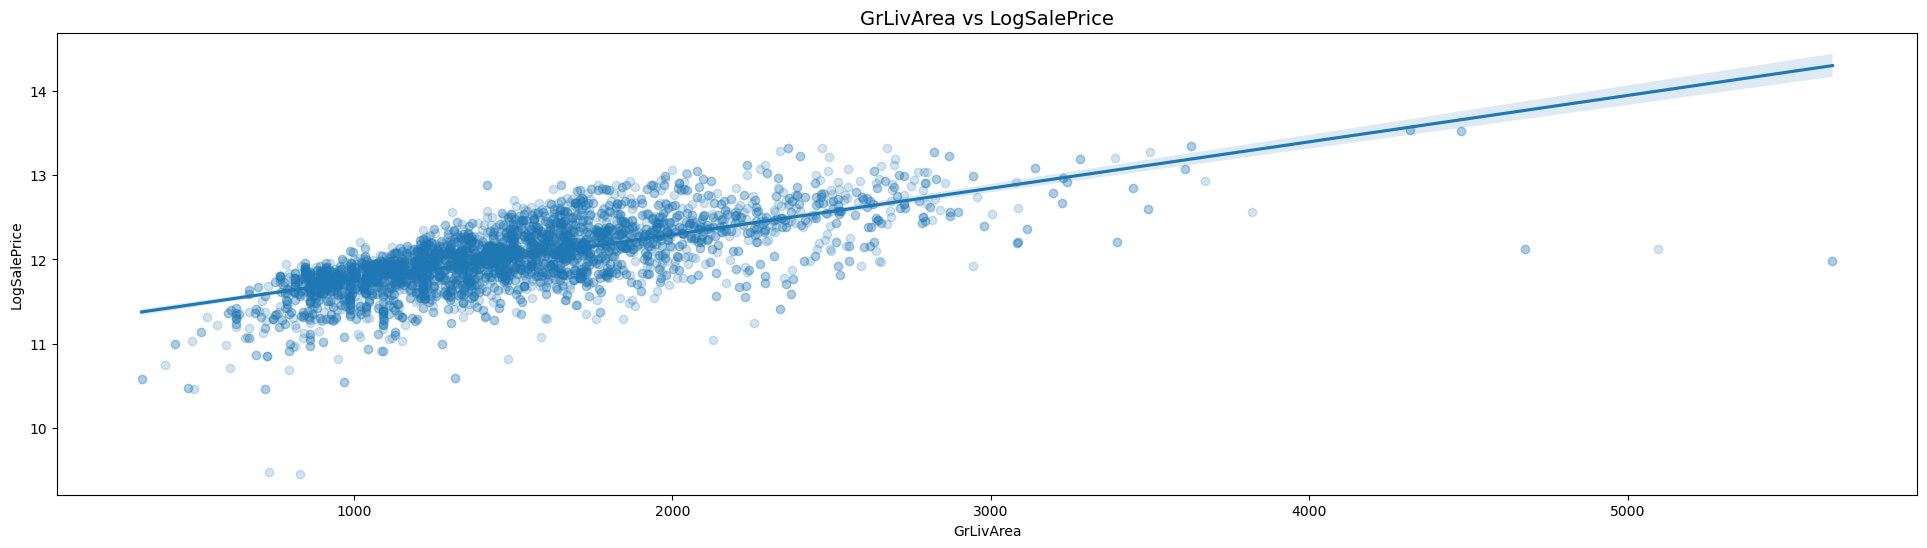

In [68]:
feat1_name, feat2_name = 'GrLivArea', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

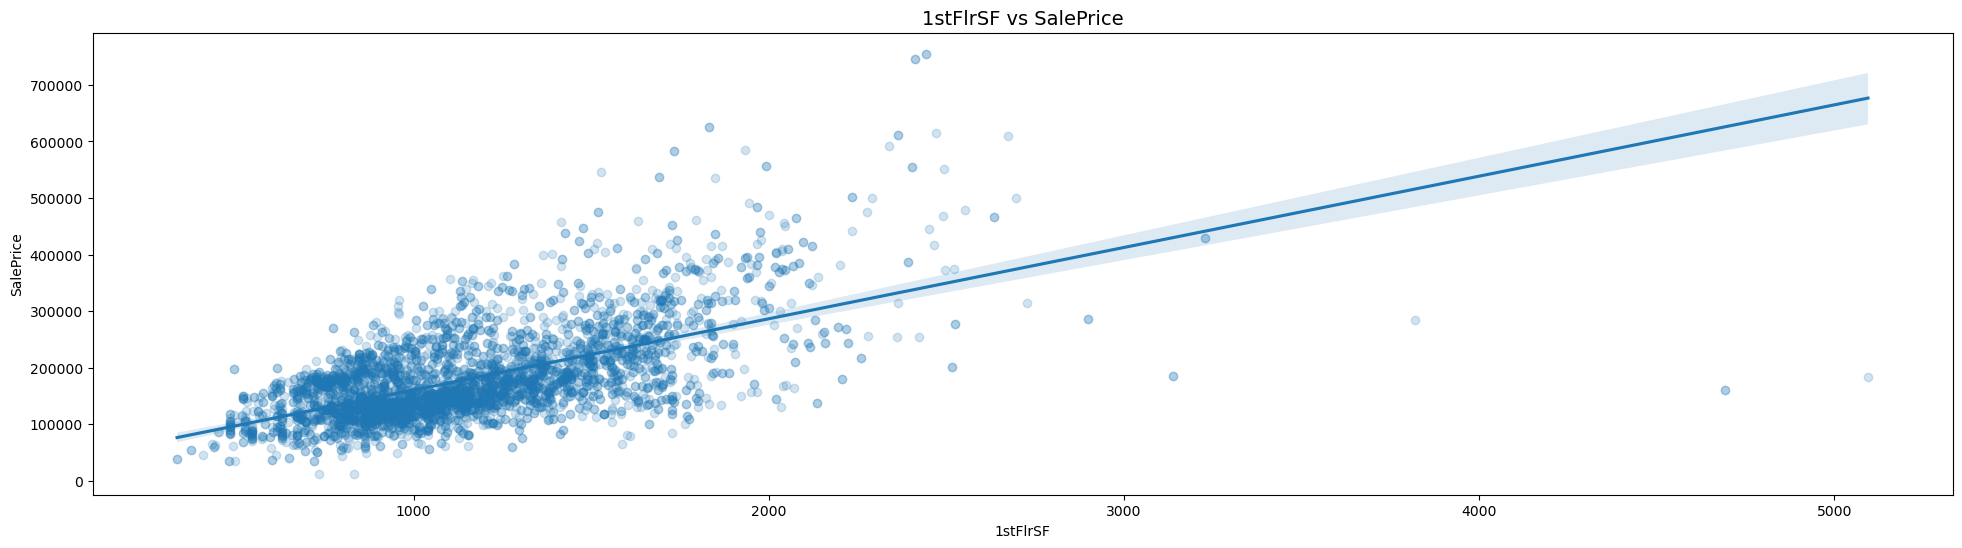

In [69]:
feat1_name, feat2_name = '1stFlrSF', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

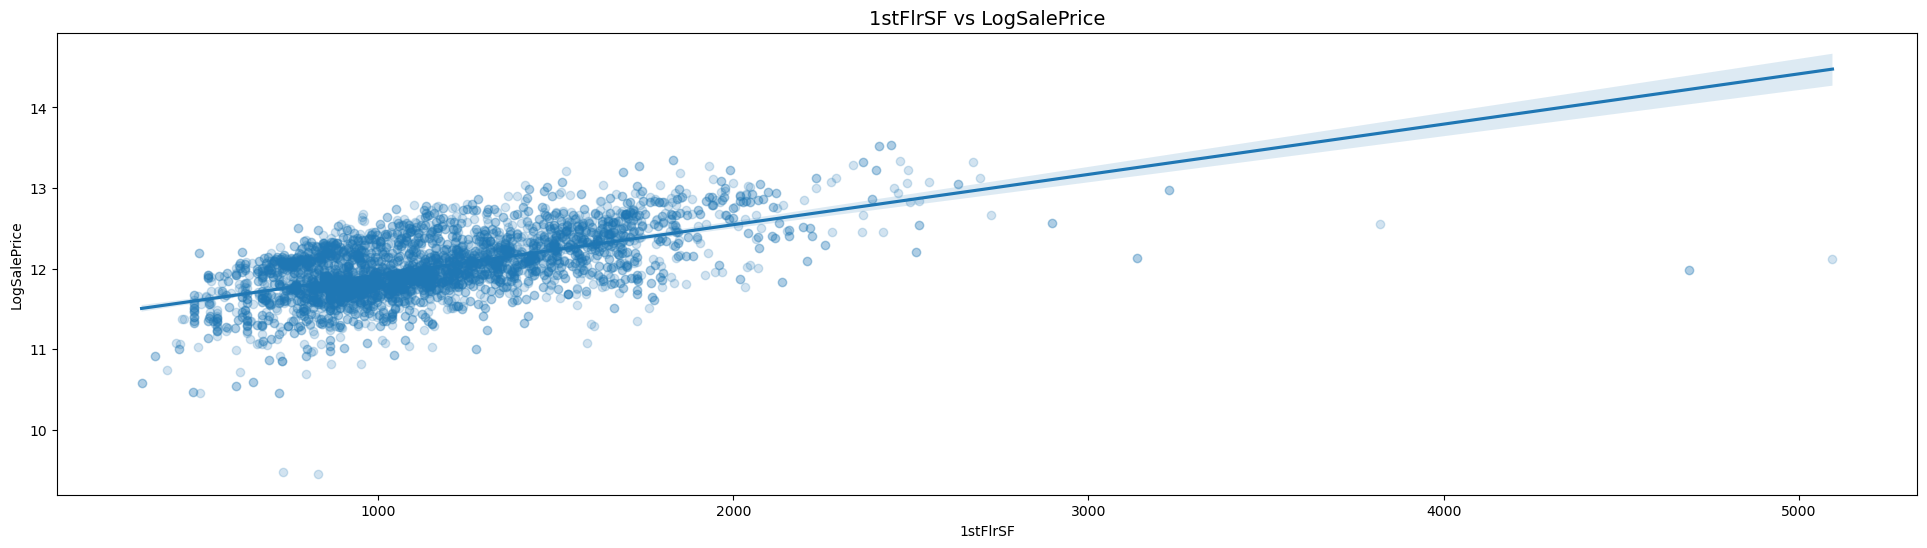

In [70]:
feat1_name, feat2_name = '1stFlrSF', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

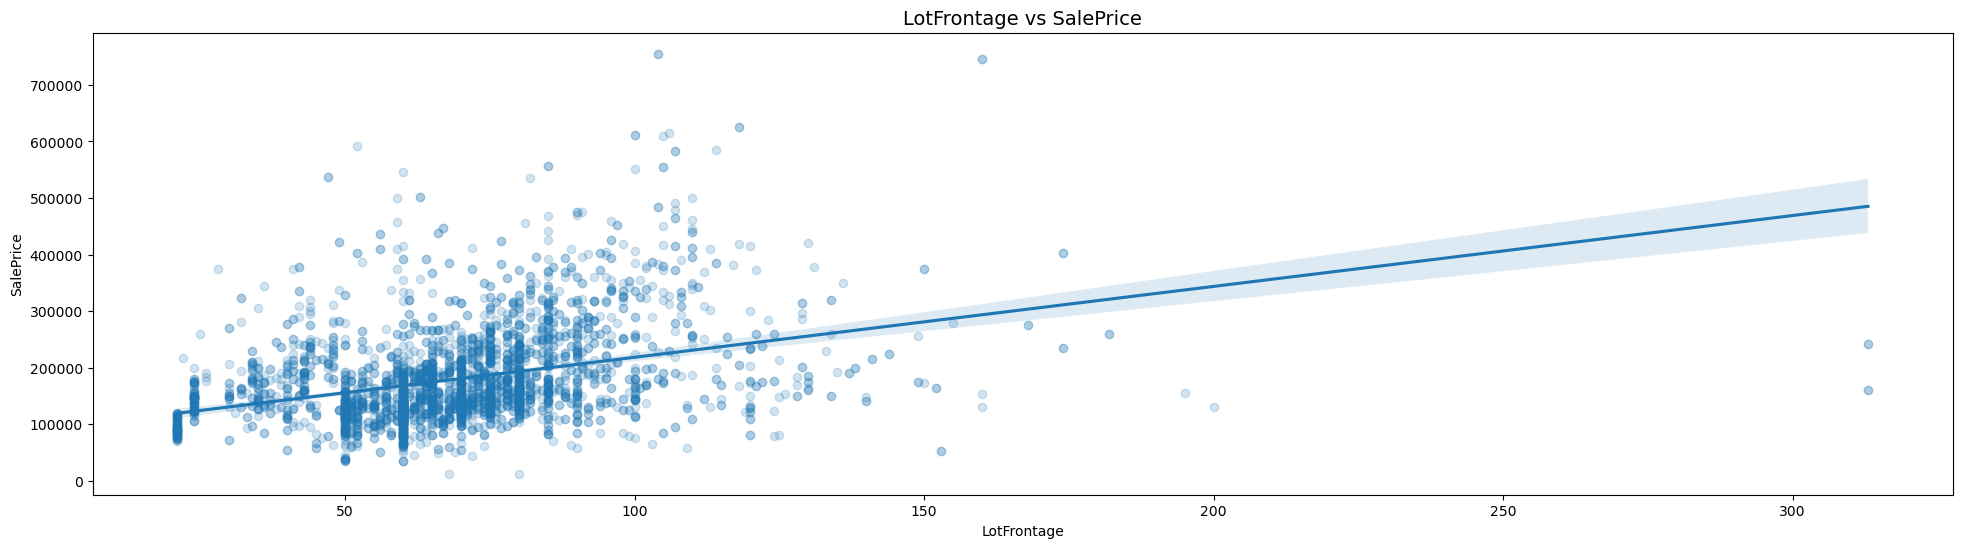

In [71]:
feat1_name, feat2_name = 'LotFrontage', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

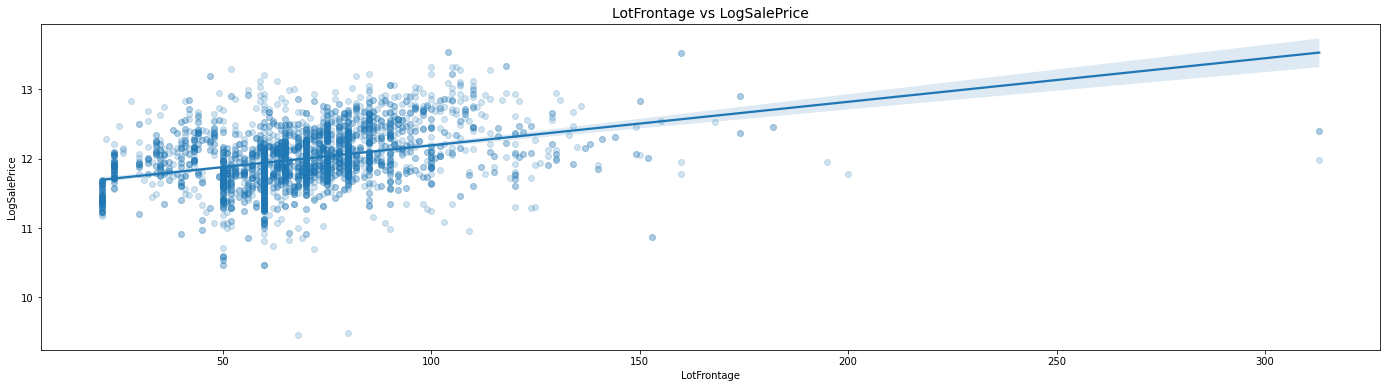

In [65]:
feat1_name, feat2_name = 'LotFrontage', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

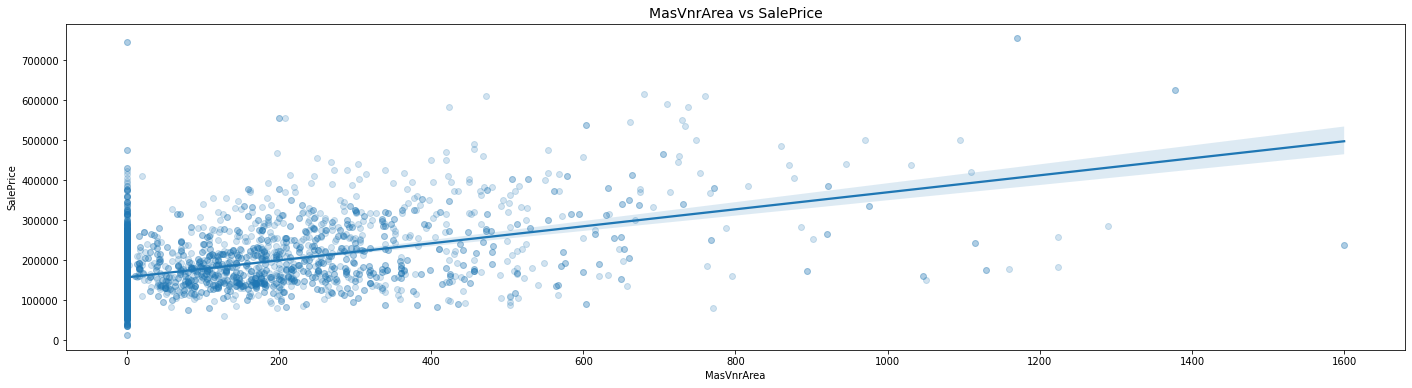

In [66]:
feat1_name, feat2_name = 'MasVnrArea', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

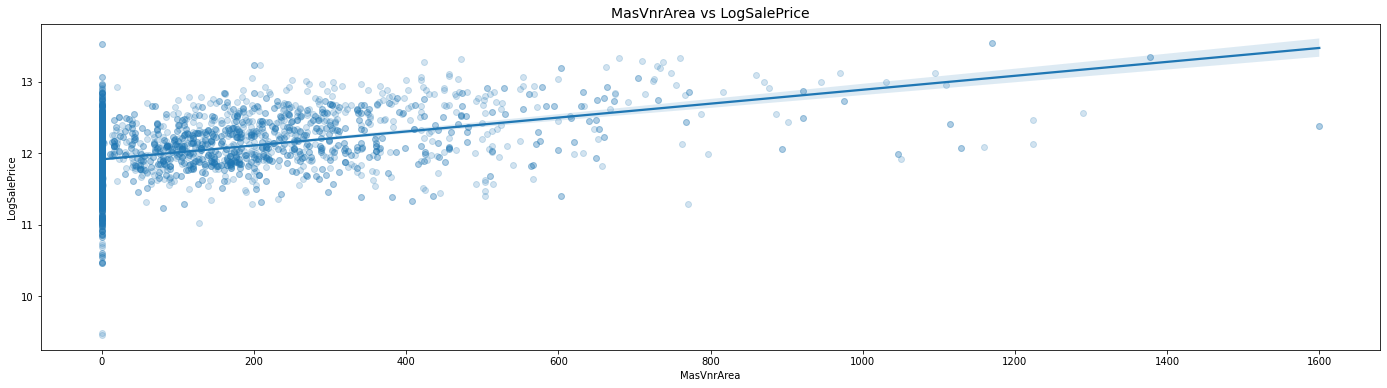

In [67]:
feat1_name, feat2_name = 'MasVnrArea', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

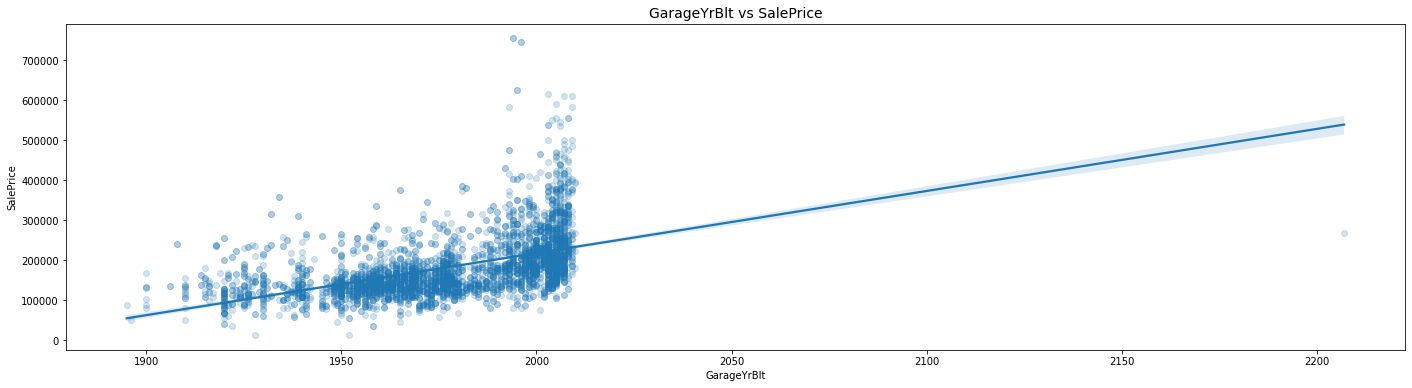

In [68]:
feat1_name, feat2_name = 'GarageYrBlt', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

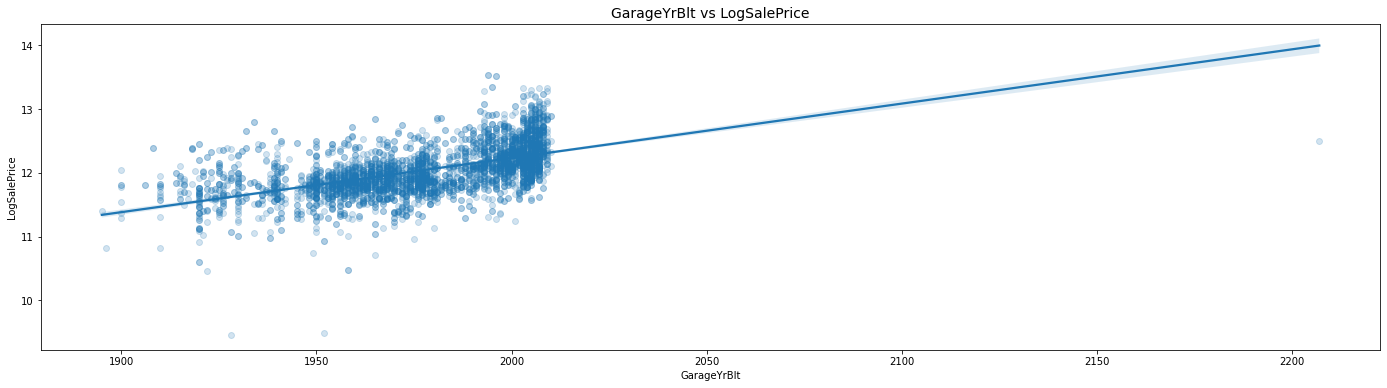

In [69]:
feat1_name, feat2_name = 'GarageYrBlt', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

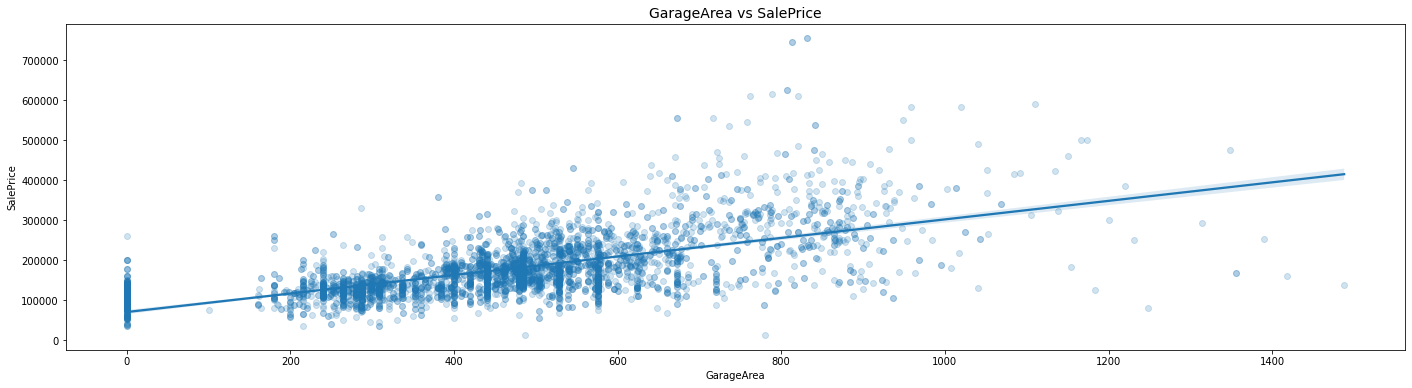

In [70]:
feat1_name, feat2_name = 'GarageArea', 'SalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

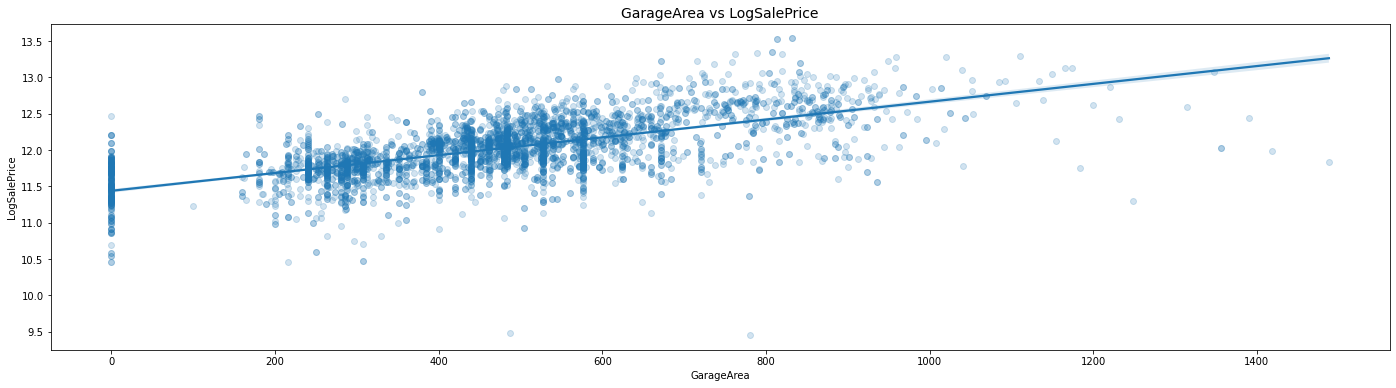

In [71]:
feat1_name, feat2_name = 'GarageArea', 'LogSalePrice'
plot_two_feats(data, feat1_name, feat2_name, (24,6))

array([[<AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'LogSalePrice'}>]], dtype=object)

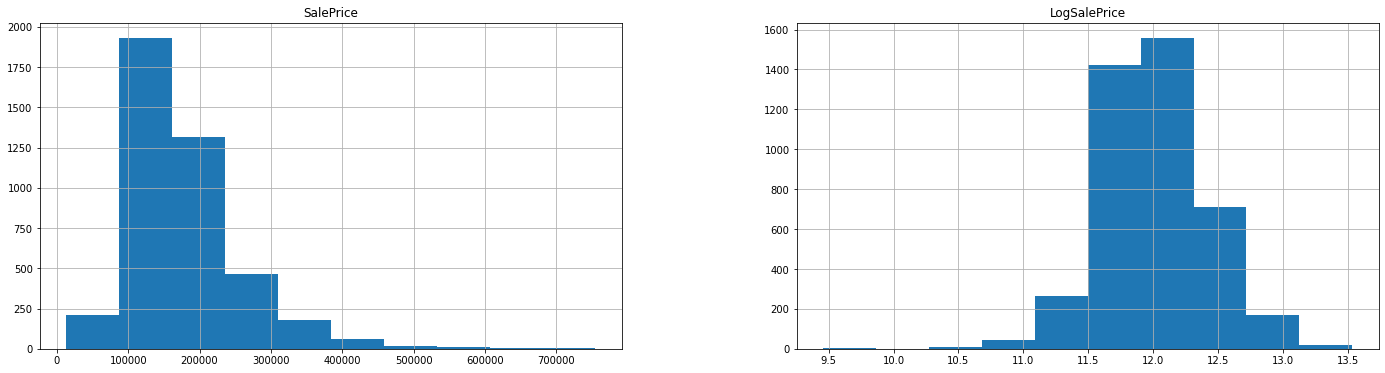

In [72]:
plt.rcParams['figure.figsize'] = (24, 6)
feat_names = ['SalePrice', 'LogSalePrice']
data[feat_names].hist()

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>],
       [<AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>],
       [<AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>],
       [<AxesSubplot:title={'center':

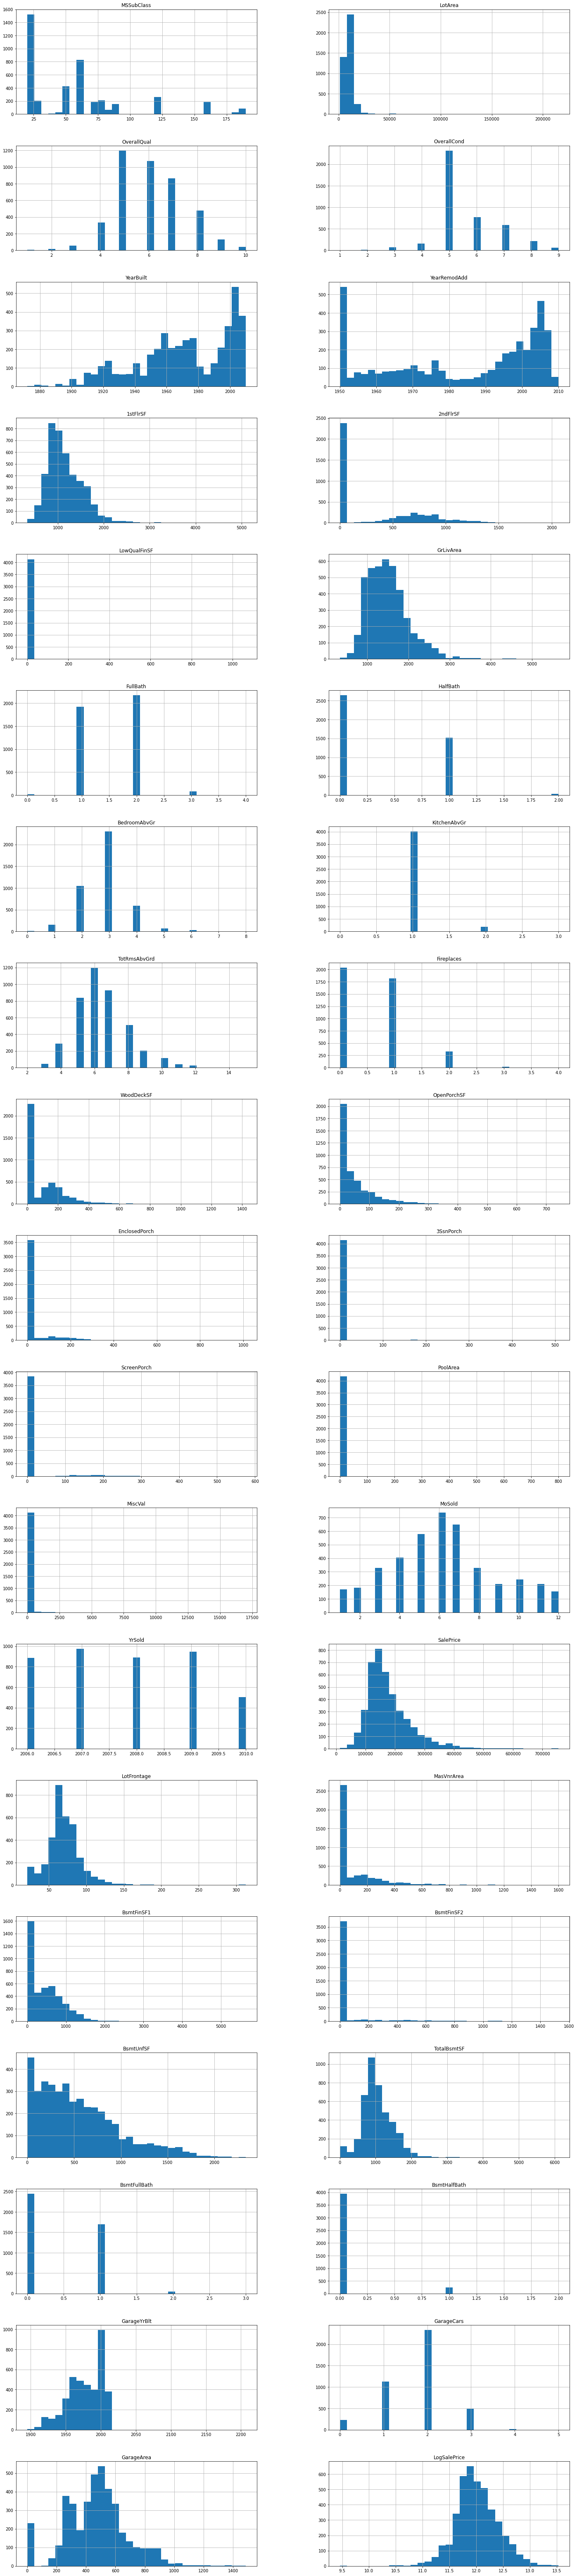

In [73]:
feat_names = list(data.dtypes[data.dtypes == 'int64'].index) + \
             list(data.dtypes[data.dtypes == 'float64'].index)
n_rows, n_cols = len(feat_names)//2+1, 2
plt.rcParams['figure.figsize'] = (24, 6*n_rows)
data[feat_names].hist(layout=(n_rows, n_cols), bins=31)

In [72]:
shap_t,shap_p = stats.shapiro(data['SalePrice'])
print("Skewness: %f" % abs(data['SalePrice']).skew())
print("Kurtosis: %f" % abs(data['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.788703
Kurtosis: 5.575270
Shapiro_Test: 0.874135
Shapiro_Test: 0.000000


In [75]:
print(calc_datatypes(data))
print(calc_datatypes(test))

{'int64': 26, 'object': 43, 'float64': 12}
{'int64': 25, 'object': 43, 'float64': 11}


In [76]:
data[['MSSubClass', 'YrSold', 'MoSold']] = data[['MSSubClass', 'YrSold', 'MoSold']].apply(str)
test[['MSSubClass', 'YrSold', 'MoSold']] = test[['MSSubClass', 'YrSold', 'MoSold']].apply(str)

In [77]:
print(calc_datatypes(data))
print(calc_datatypes(test))

{'object': 46, 'float64': 12, 'int64': 23}
{'object': 46, 'float64': 11, 'int64': 22}


In [78]:
float_columns = list(set(list(data.dtypes[data.dtypes == 'int64'].index)) - set(['SalePrice', 'LogSalePrice']))
data[float_columns] = data[float_columns].apply(np.int64)

In [79]:
float_columns = list(set(list(test.dtypes[test.dtypes == 'int64'].index)) - set(['SalePrice', 'LogSalePrice']))
test[float_columns] = test[float_columns].apply(np.int64)

In [80]:
print(calc_datatypes(data))
print(calc_datatypes(test))

{'object': 46, 'float64': 12, 'int64': 23}
{'object': 46, 'float64': 11, 'int64': 22}


In [81]:
res = get_datatypes(data)
for i in res: 
    print('==>', i, len(res[i]))
    print_long_list(res[i], 6)
    print()

==> object 46
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']
['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']
['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
['MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond']
['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir']
['Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish']
['GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']
['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

==> float64 12
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
['BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'LogSalePrice']

==> int64 23
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF']
['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'Bedroom

In [82]:
res = get_datatypes(test)
for i in res: 
    print('==>', i, len(res[i]))
    print_long_list(res[i], 6)
    print()

==> object 46
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']
['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']
['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
['MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond']
['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir']
['Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish']
['GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']
['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

==> float64 11
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
['BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

==> int64 22
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF']
['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr']
['Kitche

## Dropping nan-Features

In [73]:
# determine the threshold for missing values
def calc_percent_missing(df):
    nan_percent = {col : df[col].isnull().mean() for col in df.columns}
    return nan_percent

In [74]:
nan_percent = calc_percent_missing(data)
nan_percent = pd.DataFrame(sorted(nan_percent.items(), key=lambda x: x[1], reverse=True))
nan_percent = nan_percent[nan_percent[1] >= 0.005]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageFinish'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'GarageType'),
  Text(11, 0, 'BsmtExposure'),
  Text(12, 0, 'BsmtFinType2'),
  Text(13, 0, 'BsmtQual'),
  Text(14, 0, 'BsmtCond'),
  Text(15, 0, 'BsmtFinType1'),
  Text(16, 0, 'MasVnrType'),
  Text(17, 0, 'MasVnrArea')])

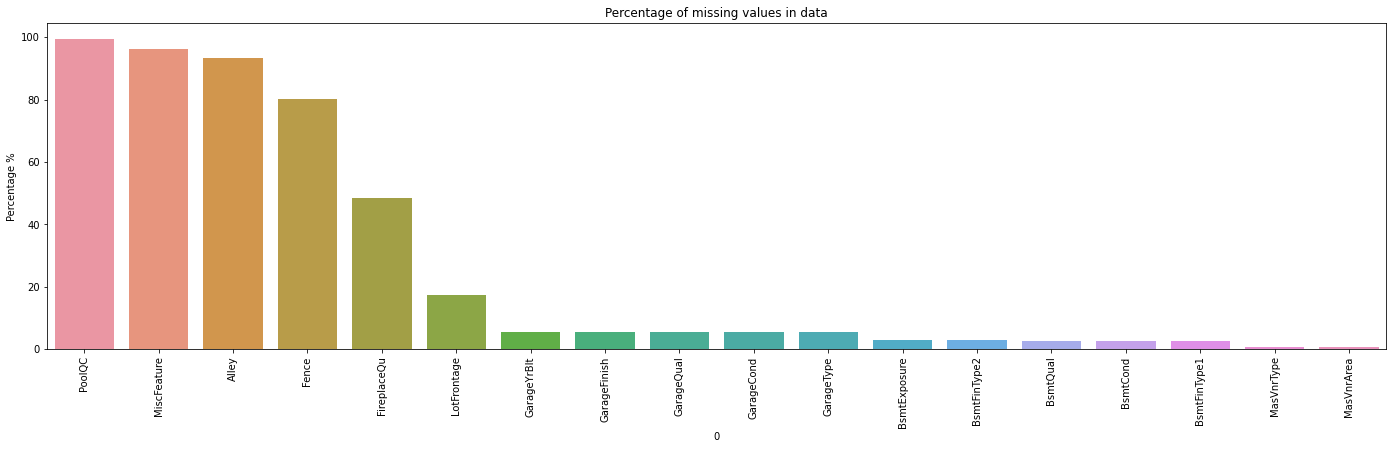

In [85]:
plt.figure(figsize=(24, 6))
sns.barplot(x=nan_percent[0], y=nan_percent[1] * 100)
plt.title("Percentage of missing values in data")
plt.ylabel("Percentage %")
plt.xticks(rotation=90)

In [86]:
# Removing the useless variables
print('data.shape      :', data.shape)
print('test.shape      :', test.shape)
data = data.drop(columns=nan_percent[0])
test = test.drop(columns=nan_percent[0])
print('data.shape      :', data.shape)
print('test.shape      :', test.shape)
data = data.drop(columns=data.dtypes[data.dtypes == 'object'].index)
test = test.drop(columns=test.dtypes[test.dtypes == 'object'].index)
print('data.shape      :', data.shape)
print('test.shape      :', test.shape)

data.shape      : (4197, 81)
test.shape      : (1459, 79)
data.shape      : (4197, 63)
test.shape      : (1459, 61)
data.shape      : (4197, 32)
test.shape      : (1459, 30)


<AxesSubplot:>

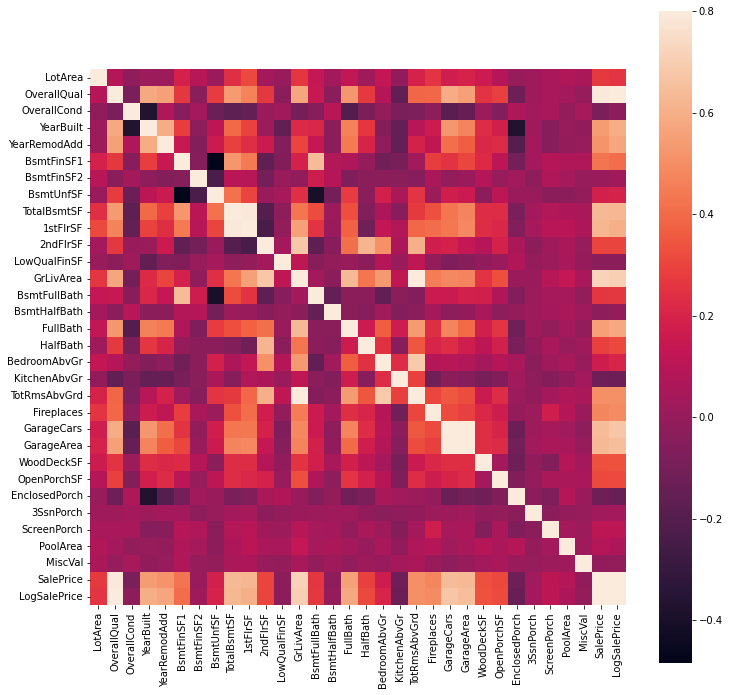

In [87]:
#correlation matrix
corrmat = data[data.dtypes[data.dtypes != 'object'].index].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

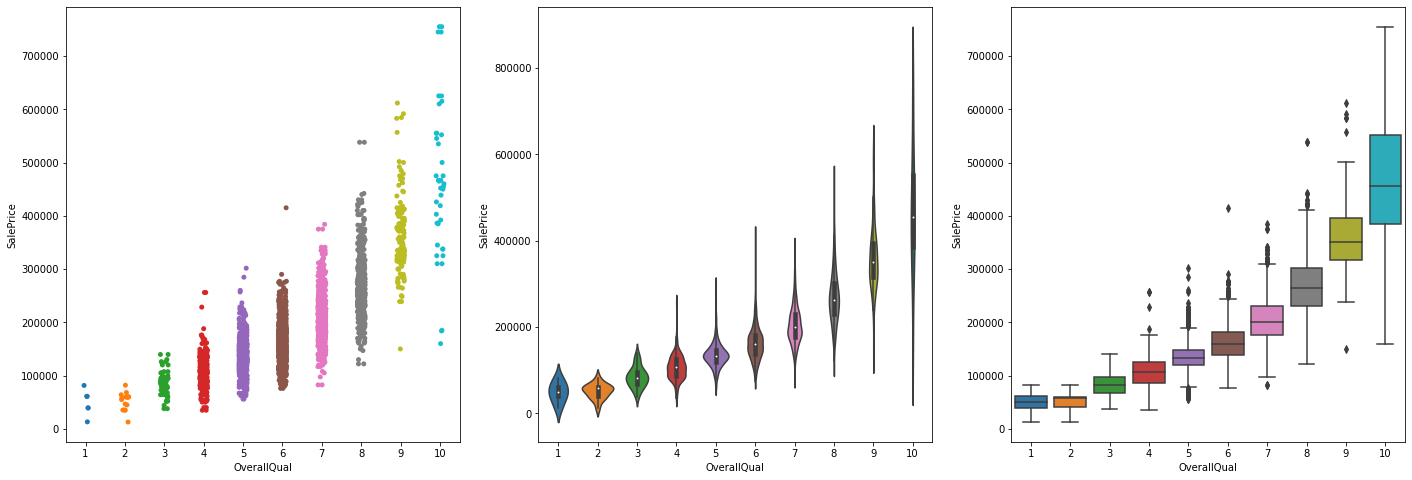

In [88]:
# OverallQuall - SalePrice [Pearson = 0.8]
figure, ax = plt.subplots(1, 3, figsize = (24, 8))
sns.stripplot (data=data, x='OverallQual', y='SalePrice', ax=ax[0])
sns.violinplot(data=data, x='OverallQual', y='SalePrice', ax=ax[1])
sns.boxplot   (data=data, x='OverallQual', y='SalePrice', ax=ax[2])
plt.show()

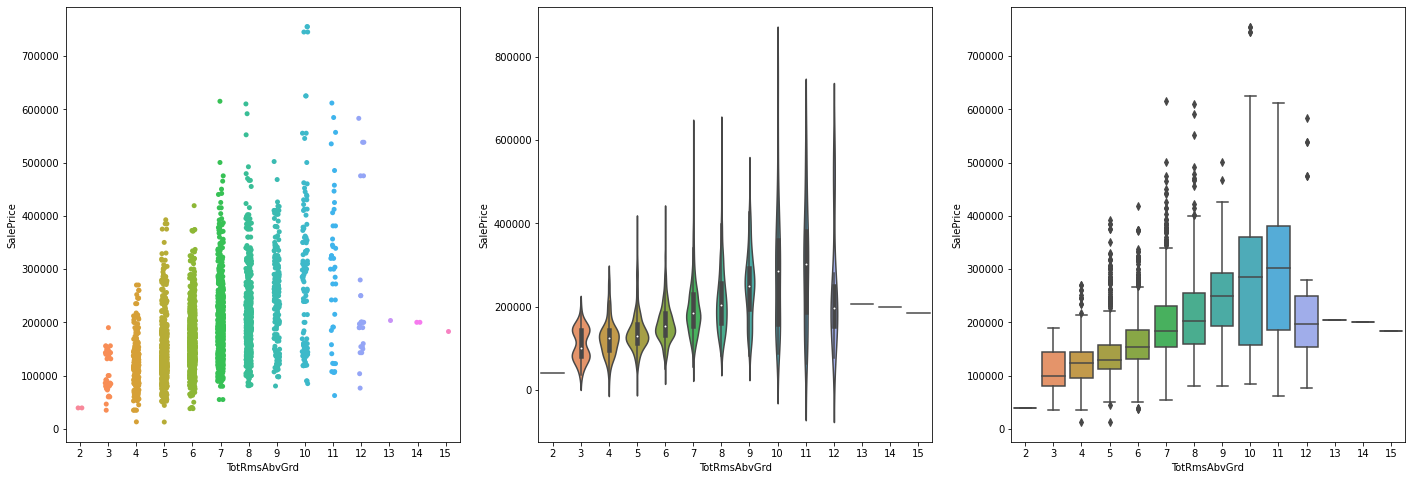

In [89]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.50]
figure, ax = plt.subplots(1, 3, figsize = (24, 8))
sns.stripplot (data=data, x='TotRmsAbvGrd', y='SalePrice', ax=ax[0])
sns.violinplot(data=data, x='TotRmsAbvGrd', y='SalePrice', ax=ax[1])
sns.boxplot   (data=data, x='TotRmsAbvGrd', y='SalePrice', ax=ax[2])
plt.show()

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>],
       [<AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>],
       [<AxesSubplot:title={'cente

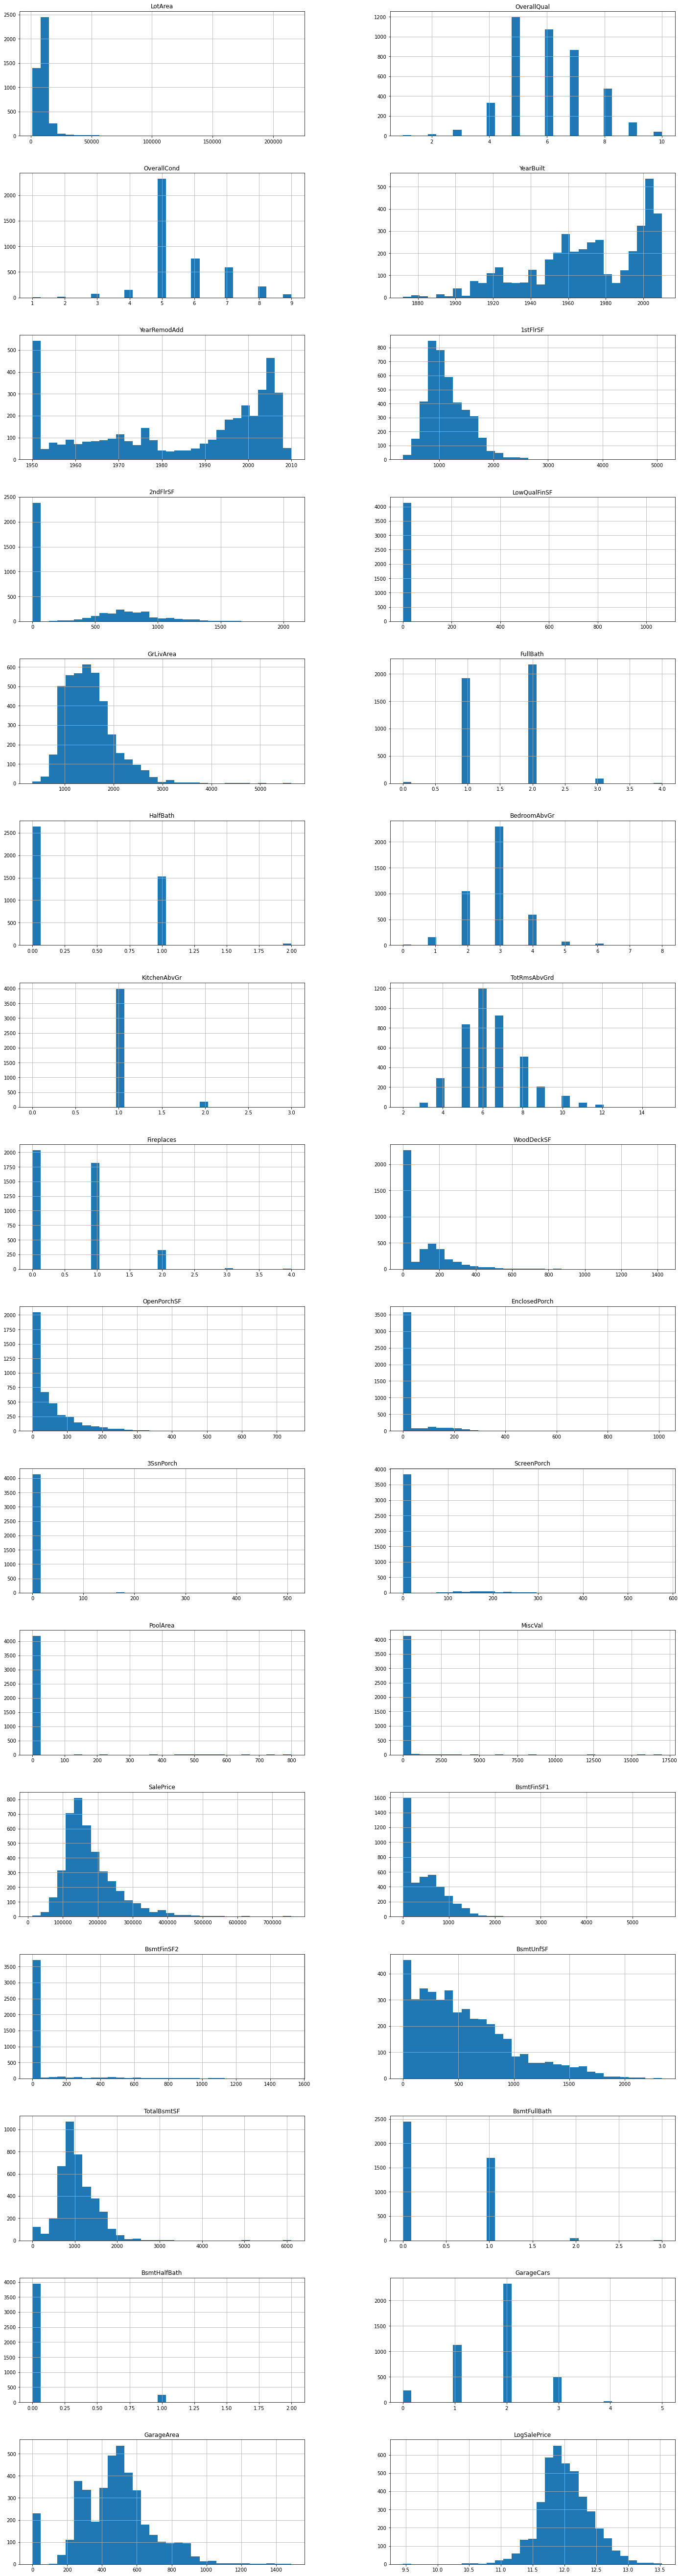

In [90]:
feat_names = list(data.dtypes[data.dtypes == 'int64'].index) + \
             list(data.dtypes[data.dtypes == 'float64'].index)
n_rows, n_cols = len(feat_names)//2+1, 2
plt.rcParams['figure.figsize'] = (24, 6*n_rows)
data[feat_names].hist(layout=(n_rows, n_cols), bins=31)

## Data Preprocessing

In [91]:
data_train_test = pd.concat([data, test])
print('data_train_test.shape      :', data_train_test.shape)

data_train_test.shape      : (5656, 32)


In [92]:
print_long_list(list(data_train_test.columns), 6)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF']
['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
['SalePrice', 'LogSalePrice']


In [93]:
# Checking the features with NaN remained out
def check_nan_exists(df):
    res = {}
    for col in df:
        if df[col].isna().sum() > 0:
            res[col] = [df[col].isna().sum(), df[col].dtype]
    return pd.DataFrame(res).T

In [94]:
check_nan_exists(data)

0        1
BsmtFinSF1    1  float64
BsmtFinSF2    1  float64
BsmtUnfSF     1  float64
TotalBsmtSF   1  float64
BsmtFullBath  2  float64
BsmtHalfBath  2  float64
GarageCars    1  float64
GarageArea    1  float64

In [95]:
# Checking the features with NaN remained out
def replace_nan_values(df):
    for col in df:
        df[col] = df[col].fillna(df[col].mode()[0])

In [96]:
replace_nan_values(data_train_test)

In [97]:
check_nan_exists(data_train_test)

Empty DataFrame
Columns: []
Index: []

In [98]:
print('data_train_test.shape      :', data_train_test.shape)

data_train_test.shape      : (5656, 32)


## Feature Engineering

In [99]:
data_train_test["SqFtPerRoom"]        = data_train_test["GrLivArea"] / \
                                                        (data_train_test["TotRmsAbvGrd"] + data_train_test["FullBath"]
                                                       + data_train_test["HalfBath"] + data_train_test["KitchenAbvGr"])
data_train_test['Total_Home_Quality'] = data_train_test['OverallQual'] + data_train_test['OverallCond']
data_train_test['Total_Bathrooms']    = data_train_test['FullBath'] + 0.5 * data_train_test['HalfBath'] \
                                      + data_train_test['BsmtFullBath'] + 0.5 * data_train_test['BsmtHalfBath']
data_train_test["HighQualSF"]         = data_train_test["1stFlrSF"] + data_train_test["2ndFlrSF"]

In [100]:
# Creating dummy variables from categorical features
data_train_test_dummy = pd.get_dummies(data_train_test)

In [101]:
calc_datatypes(data_train_test_dummy)

{'int64': 24, 'float64': 12}

In [102]:
res = get_datatypes(data_train_test_dummy)
for i in res: 
    print('==>', i, len(res[i]))
    print_long_list(res[i], 6)
    print()

==> int64 24
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF']
['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr']
['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Total_Home_Quality', 'HighQualSF']

==> float64 12
['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
['GarageCars', 'GarageArea', 'SalePrice', 'LogSalePrice', 'SqFtPerRoom', 'Total_Bathrooms']



In [103]:
numeric_features = data_train_test_dummy.dtypes[data_train_test_dummy.dtypes != object].index
print_long_list(list(numeric_features), 6)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF']
['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
['SalePrice', 'LogSalePrice', 'SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'HighQualSF']


In [104]:
skewed_features  = data_train_test_dummy[numeric_features].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewed_features

MiscVal               21.623178
PoolArea              17.009934
LotArea               12.893599
LowQualFinSF          12.048779
3SsnPorch             11.602009
KitchenAbvGr           4.244066
BsmtFinSF2             4.126202
EnclosedPorch          3.997698
ScreenPorch            3.945306
BsmtHalfBath           3.883775
OpenPorchSF            2.568483
SalePrice              2.307706
WoodDeckSF             1.853955
1stFlrSF               1.416233
BsmtFinSF1             1.219610
GrLivArea              1.191918
HighQualSF             1.171529
TotalBsmtSF            0.963669
BsmtUnfSF              0.930432
2ndFlrSF               0.856844
SqFtPerRoom            0.846011
TotRmsAbvGrd           0.752652
Fireplaces             0.740094
HalfBath               0.700583
BsmtFullBath           0.616365
OverallCond            0.553849
Total_Bathrooms        0.510132
LogSalePrice           0.393373
BedroomAbvGr           0.320760
GarageArea             0.214695
OverallQual            0.199243
FullBath

In [105]:
high_skew = skewed_features[skewed_features > 0.5]
high_skew

MiscVal            21.623178
PoolArea           17.009934
LotArea            12.893599
LowQualFinSF       12.048779
3SsnPorch          11.602009
KitchenAbvGr        4.244066
BsmtFinSF2          4.126202
EnclosedPorch       3.997698
ScreenPorch         3.945306
BsmtHalfBath        3.883775
OpenPorchSF         2.568483
SalePrice           2.307706
WoodDeckSF          1.853955
1stFlrSF            1.416233
BsmtFinSF1          1.219610
GrLivArea           1.191918
HighQualSF          1.171529
TotalBsmtSF         0.963669
BsmtUnfSF           0.930432
2ndFlrSF            0.856844
SqFtPerRoom         0.846011
TotRmsAbvGrd        0.752652
Fireplaces          0.740094
HalfBath            0.700583
BsmtFullBath        0.616365
OverallCond         0.553849
Total_Bathrooms     0.510132
dtype: float64

In [106]:
skew_index = high_skew.index
print_long_list(list(skew_index), 6)

['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'KitchenAbvGr']
['BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath', 'OpenPorchSF', 'SalePrice']
['WoodDeckSF', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'HighQualSF', 'TotalBsmtSF']
['BsmtUnfSF', '2ndFlrSF', 'SqFtPerRoom', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath']
['BsmtFullBath', 'OverallCond', 'Total_Bathrooms']


In [107]:
# Normalize skewed features using log_transformation
for i in skew_index:
    data_train_test_dummy[i] = np.log1p(data_train_test_dummy[i])

In [108]:
data_train_test_dummy.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0  10.366309            6     1.791759       1960          1960    6.461468   
1   9.360741            5     1.945910       1961          1961    6.150603   
2   9.565775            6     1.945910       1958          1958    6.828712   
3   9.320181            7     1.791759       1968          1968    6.971669   
4   9.534668            5     1.791759       1997          1998    6.674561   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  3SsnPorch  ScreenPorch  \
0    0.000000   6.091310     6.985642  7.412764  ...        0.0     0.000000   
1    4.976734   5.602119     6.783325  6.799056  ...        0.0     4.795791   
2    0.000000   6.008813     7.192934  7.192934  ...        0.0     0.000000   
3    0.000000   6.952729     7.654917  7.654917  ...        0.0     0.000000   
4    0.000000   4.927254     6.834109  6.834109  ...        0.0     0.000000   

   PoolArea   MiscVal  SalePrice  LogSalePrice  SqFtPerRoom  \
0       0.0  0.000000  12.278398     12.278393     5.220356   
1       0.0  0.000000  11.561725     11.561716     4.859812   
2       0.0  9.433564  12.055256     12.055250     5.001707   
3       0.0  0.000000  12.404928     12.404924     5.175208   
4       0.0  0.000000  12.154258     12.154253     5.099256   

   Total_Home_Quality  Total_Bathrooms  HighQualSF  
0                  11         1.098612    7.412764  
1                  11         0.693147    6.799056  
2                  12         0.916291    7.192934  
3                  12         1.504077    7.654917  
4                  10         1.252763    7.396335  

[5 rows x 36 columns]

In [109]:
print_long_list(list(data_train_test_dummy.columns), 6)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF']
['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
['SalePrice', 'LogSalePrice', 'SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'HighQualSF']


In [110]:
data_train_test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LotArea             5656 non-null   float64
 1   OverallQual         5656 non-null   int64  
 2   OverallCond         5656 non-null   float64
 3   YearBuilt           5656 non-null   int64  
 4   YearRemodAdd        5656 non-null   int64  
 5   BsmtFinSF1          5656 non-null   float64
 6   BsmtFinSF2          5656 non-null   float64
 7   BsmtUnfSF           5656 non-null   float64
 8   TotalBsmtSF         5656 non-null   float64
 9   1stFlrSF            5656 non-null   float64
 10  2ndFlrSF            5656 non-null   float64
 11  LowQualFinSF        5656 non-null   float64
 12  GrLivArea           5656 non-null   float64
 13  BsmtFullBath        5656 non-null   float64
 14  BsmtHalfBath        5656 non-null   float64
 15  FullBath            5656 non-null   int64  
 16  HalfBa

In [111]:
data_train_test_dummy.describe()

LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  5656.000000  5656.000000  5656.000000  5656.000000   5656.000000   
mean      9.091382     6.064533     1.869276  1970.707390   1983.915311   
std       0.511637     1.397955     0.173977    30.159249     20.802165   
min       7.170888     1.000000     0.693147  1872.000000   1950.000000   
25%       8.913853     5.000000     1.791759  1953.000000   1965.000000   
50%       9.149103     6.000000     1.791759  1972.000000   1992.000000   
75%       9.351601     7.000000     1.945910  2000.000000   2003.000000   
max      12.279537    10.000000     2.302585  2010.000000   2010.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  5656.000000  5656.000000  5656.000000  5656.000000  5656.000000  ...   
mean      4.252545     0.694416     5.604460     6.719972     6.999235  ...   
std       2.969113     1.892500     1.876951     1.193780     0.319869  ...   
min       0.000000     0.000000     0.000000     0.000000     5.814131  ...   
25%       0.000000     0.000000     5.379897     6.670766     6.775366  ...   
50%       5.921578     0.000000     6.133398     6.892642     6.982863  ...   
75%       6.598509     0.000000     6.678342     7.158514     7.227662  ...   
max       8.638525     7.331060     7.756623     8.717846     8.536211  ...   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal    SalePrice  \
count  5656.000000  5656.000000  5656.000000  5656.000000  5656.000000   
mean      0.064005     0.454635     0.027149     0.237861    11.960637   
std       0.578188     1.464417     0.408650     1.248789     0.354519   
min       0.000000     0.000000     0.000000     0.000000     9.456419   
25%       0.000000     0.000000     0.000000     0.000000    11.813037   
50%       0.000000     0.000000     0.000000     0.000000    11.831386   
75%       0.000000     0.000000     0.000000     0.000000    12.143205   
max       6.232448     6.357842     6.685861     9.741027    13.534474   

       LogSalePrice  SqFtPerRoom  Total_Home_Quality  Total_Bathrooms  \
count   5656.000000  5656.000000         5656.000000      5656.000000   
mean      11.960630     5.047657           11.643918         1.134831   
std        0.354521     0.171800            1.710262         0.255397   
min        9.456341     4.411585            2.000000         0.693147   
25%       11.813030     4.927254           11.000000         0.916291   
50%       11.831379     5.044597           12.000000         1.098612   
75%       12.143199     5.154768           13.000000         1.252763   
max       13.534473     5.868237           19.000000         2.079442   

        HighQualSF  
count  5656.000000  
mean      7.254116  
std       0.324582  
min       5.814131  
25%       7.016610  
50%       7.270313  
75%       7.460490  
max       8.638171  

[8 rows x 36 columns]

In [112]:
data_train_test_dummy.shape

(5656, 36)

In [113]:
res = get_datatypes(data_train_test_dummy)
for i in res: 
    print('==>', i, len(res[i]))
    print_long_list(res[i], 6)
    print()

==> float64 30
['LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']
['HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']
['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
['MiscVal', 'SalePrice', 'LogSalePrice', 'SqFtPerRoom', 'Total_Bathrooms', 'HighQualSF']

==> int64 6
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'Total_Home_Quality']



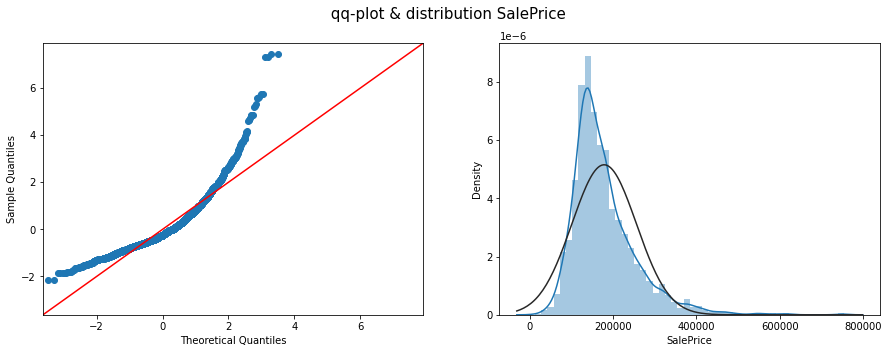

In [114]:
# SalePrice before transformation
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(data['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(data['SalePrice'], kde = True, hist=True, fit = stats.norm, ax = ax[1])
plt.show()

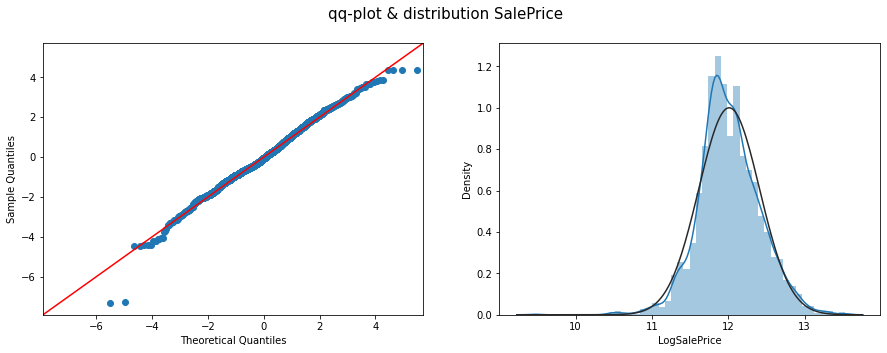

In [115]:
# SalePrice after transformation
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(data['LogSalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(data['LogSalePrice'], kde = True, hist=True, fit = stats.norm, ax = ax[1])
plt.show()

In [116]:
from xgboost                 import XGBRegressor
from catboost                import Pool
from catboost                import CatBoostRegressor
from lightgbm                import LGBMRegressor
from sklearn.svm             import SVR
from sklearn.naive_bayes     import GaussianNB
from sklearn.tree            import DecisionTreeRegressor
from mlxtend.regressor       import StackingRegressor
from sklearn.linear_model    import LinearRegression, BayesianRidge, ElasticNet, Lasso, \
                                    LassoLarsIC, Ridge, RidgeCV, LassoCV, LassoLarsCV, SGDRegressor
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, train_test_split, \
                                    GridSearchCV, RandomizedSearchCV
from sklearn.ensemble        import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics         import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.kernel_ridge    import KernelRidge
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import RobustScaler, PolynomialFeatures
from sklearn.base            import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [117]:
data_dummy, test_dummy = data_train_test_dummy[:len(data)], data_train_test_dummy[len(data):]

In [118]:
print('data_dummy.shape :', data_dummy.shape)

data_dummy.shape : (4197, 36)


In [119]:
print('test_dummy.shape :', test_dummy.shape)

test_dummy.shape : (1459, 36)


In [120]:
untarget_data = data_dummy.drop(columns=['SalePrice', 'LogSalePrice'])
print('untarget_data.shape :', untarget_data.shape)

untarget_data.shape : (4197, 34)


In [121]:
target = data_dummy['LogSalePrice']
print('target.shape :', target.shape)

target.shape : (4197,)


In [122]:
test_dummy = test_dummy.drop(columns=['SalePrice', 'LogSalePrice'])
print('test_dummy.shape :', test_dummy.shape)

test_dummy.shape : (1459, 34)


In [77]:
# 5 Fold Cross validation
#kf = KFold(n_splits=5, shuffle=True)
cv_scores, cv_std = [],[]

In [124]:
# Creation of the RMSE metric:    
def rmse(model):
    return np.sqrt(-cross_val_score(model, untarget_data, target, scoring="neg_mean_squared_error", cv=kf))

In [125]:
def apply_learning_algorithm(model):
    score = rmse(model)
    cv_scores.append(score.mean())
    cv_std.append(score.std())

In [126]:
models = [
    Ridge(alpha = 10),
    LassoCV(alphas = [1, 0.1, 0.001, 0.0005]),
    XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1),
    LinearRegression(),                               # Linear Regression
    BayesianRidge(compute_score=True),     # Bayesian Ridge Regression
    LGBMRegressor(                         # Light Gradient Boost Regressor
                      objective='regression',
                      num_leaves=5,
                      learning_rate=0.05, 
                      n_estimators=720,
                      max_bin = 55, 
                      bagging_fraction = 0.8,
                      bagging_freq = 5, 
                      feature_fraction = 0.2319,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf =6, 
                      min_sum_hessian_in_leaf = 11),
    SVR(kernel='rbf', C=1000000, epsilon=0.001),                                 # Support Vector Regression
    DecisionTreeRegressor(),               # Decision Tree Regressor
    RandomForestRegressor(n_estimators=1000),               # Random Forest Regressor
    XGBRegressor(                          # XGB Regressor
                      colsample_bytree=0.4603, 
                      gamma=0.0468, 
                      learning_rate=0.05, 
                      max_depth=3, 
                      min_child_weight=1.7817, 
                      n_estimators=2200,
                      reg_alpha=0.4640, 
                      reg_lambda=0.8571,
                      subsample=0.5213),
    GradientBoostingRegressor(             # Gradient Boost Regressor
                      n_estimators=3000, 
                      learning_rate=0.05,
                      max_depth=4, 
                      max_features='sqrt',
                      min_samples_leaf=15, 
                      min_samples_split=10, 
                      loss='huber'),
    CatBoostRegressor(),                   # Cat Boost Regressor
    StackingRegressor(                     # Stacked Regressor
                      regressors=(CatBoostRegressor(),
                                  LinearRegression(),
                                  BayesianRidge(),
                                  GradientBoostingRegressor()),
                                  meta_regressor = CatBoostRegressor(),
                                  use_features_in_secondary = True),
    make_pipeline(                         # Lasso Regression
                      RobustScaler(), 
                      Lasso(alpha =0.0005)),
    make_pipeline(                         # Elastic Net Regression
                      RobustScaler(), 
                      ElasticNet(alpha=0.0005, l1_ratio=.9)),
    KernelRidge(                           # Kernel Ridge Regression
                      alpha=0.6, 
                      kernel='polynomial', 
                      degree=2, 
                      coef0=2.5),
]

In [127]:
model_names = [
    'Ridge',
    'LassoCV', 
    'XGBRegressor',
    'LinearRegression',
    'BayesianRidge', 
    'LGBMRegressor',
    'SupportVectorRegressor', 
    'DecisionTreeRegressor',
    'RandomForestRegressor', 
    'XGBRegressor', 
    'GradientBoostingRegressor', 
    'CatBoostRegressor',
    'StackingRegressor',
    'LassoRegressor',
    'ElasticNetRegressor',
    'KernelRidgeRegressor'
]

In [128]:
for model in models:
    apply_learning_algorithm(model)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

In [129]:
print('len(models):', len(models))
print('len(model_names)', len(model_names))

len(models): 16
len(model_names) 16


In [130]:
print('len(cv_scores):', len(cv_scores))
print('len(cv_std):', len(cv_std))

len(cv_scores): 16
len(cv_std): 16


In [131]:
cv_scores

[0.13303717512425503,
 0.13308139663409674,
 0.11831703926773326,
 0.1328130873103898,
 0.1324803453248796,
 0.11680445836584818,
 0.3443962931127912,
 0.1453552437396103,
 0.10826923710649294,
 0.11247704253691004,
 0.10859450439975686,
 0.10512257397849345,
 0.09859753477314001,
 0.13245999826462881,
 0.13230251645298752,
 0.13250665591932204]

In [132]:

cv_std

[0.005394415349014552,
 0.008777983156927145,
 0.007933728825028142,
 0.005176546992241809,
 0.010879640840275493,
 0.0043971488117569325,
 0.027704913878823945,
 0.008113602971703474,
 0.00871209368140149,
 0.006768582789660746,
 0.015342469921164417,
 0.0067114476026992696,
 0.007983017369277734,
 0.009893432952642871,
 0.008386573109248396,
 0.006734778801865447]

In [133]:
final_cv_score = pd.DataFrame(model_names, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std
final_cv_score

Regressors  RMSE_mean  RMSE_std
0                       Ridge   0.133037  0.005394
1                     LassoCV   0.133081  0.008778
2                XGBRegressor   0.118317  0.007934
3            LinearRegression   0.132813  0.005177
4               BayesianRidge   0.132480  0.010880
5               LGBMRegressor   0.116804  0.004397
6      SupportVectorRegressor   0.344396  0.027705
7       DecisionTreeRegressor   0.145355  0.008114
8       RandomForestRegressor   0.108269  0.008712
9                XGBRegressor   0.112477  0.006769
10  GradientBoostingRegressor   0.108595  0.015342
11          CatBoostRegressor   0.105123  0.006711
12          StackingRegressor   0.098598  0.007983
13             LassoRegressor   0.132460  0.009893
14        ElasticNetRegressor   0.132303  0.008387
15       KernelRidgeRegressor   0.132507  0.006735

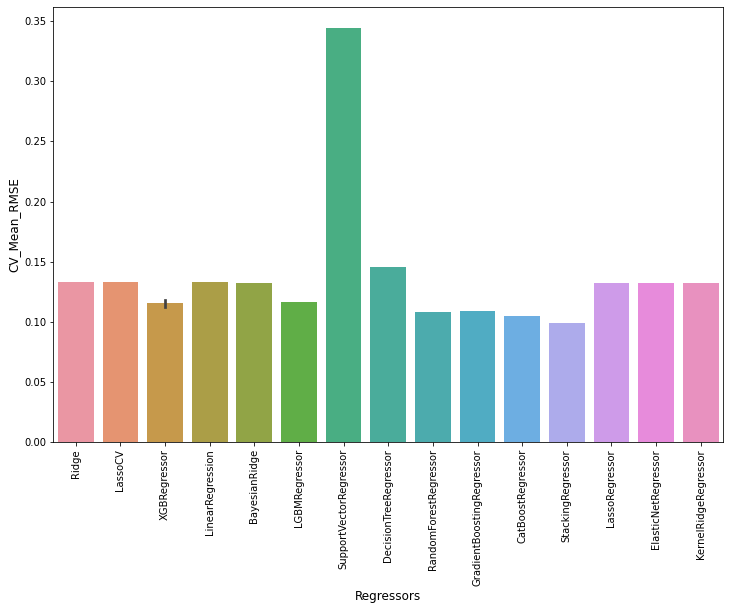

In [134]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors',   fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [135]:
# Train-Test split the data
x_train, x_validation, y_train, y_validation = \
            train_test_split(untarget_data, target, test_size = 0.1)

In [136]:
best_regressor_name = final_cv_score.sort_values(by=['RMSE_mean']).head(1)['Regressors'].iloc[0]
best_regressor = models[model_names.index(best_regressor_name)]
best_regressor

StackingRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x7f75aad823d0>,
                  regressors=(<catboost.core.CatBoostRegressor object at 0x7f75aad822d0>,
                              LinearRegression(), BayesianRidge(),
                              GradientBoostingRegressor()),
                  use_features_in_secondary=True)

In [137]:
# The Best Regressor
best_model = best_regressor.fit(x_train, y_train)

Learning rate set to 0.050509
0:	learn: 0.3858079	total: 4.16ms	remaining: 4.16s
1:	learn: 0.3724090	total: 7.76ms	remaining: 3.87s
2:	learn: 0.3596631	total: 11.3ms	remaining: 3.74s
3:	learn: 0.3477475	total: 14.7ms	remaining: 3.67s
4:	learn: 0.3365262	total: 18.4ms	remaining: 3.65s
5:	learn: 0.3259501	total: 21.9ms	remaining: 3.62s
6:	learn: 0.3158958	total: 25.4ms	remaining: 3.6s
7:	learn: 0.3061297	total: 28.9ms	remaining: 3.58s
8:	learn: 0.2967241	total: 32.5ms	remaining: 3.58s
9:	learn: 0.2883438	total: 36.1ms	remaining: 3.57s
10:	learn: 0.2800893	total: 40ms	remaining: 3.59s
11:	learn: 0.2721595	total: 43.7ms	remaining: 3.59s
12:	learn: 0.2644296	total: 47.3ms	remaining: 3.59s
13:	learn: 0.2568546	total: 50.6ms	remaining: 3.56s
14:	learn: 0.2498456	total: 54.3ms	remaining: 3.56s
15:	learn: 0.2434017	total: 58ms	remaining: 3.56s
16:	learn: 0.2368674	total: 61.6ms	remaining: 3.56s
17:	learn: 0.2310820	total: 65.1ms	remaining: 3.55s
18:	learn: 0.2251515	total: 69ms	remaining: 3.56s

In [138]:
# Creation of the RMSE metric:    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [139]:
pred = best_model.predict(x_validation)
score = rmse(y_validation, pred)
score

0.0839255250005369

## Submission

In [140]:
# Test CSV Submission
test_pred = best_model.predict(test_dummy)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

Id      SalePrice
0  1461  130646.788742
1  1462  171865.265008
2  1463  187792.320379
3  1464  192959.851489
4  1465  184572.516454

In [141]:
# Saving the results in a csv file
submission.to_csv("result.csv", index = False, header = True)